<a href="https://colab.research.google.com/github/EnriqueQM/bmw-pricing-proyecto/blob/main/BMW_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PASOS INICIALES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder,OrdinalEncoder

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## BWM PRICING


In [6]:
df_bmw = pd.read_csv("/content/drive/MyDrive/bmw_pricing_v3.csv", sep=",")
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [7]:
df_bmw.shape

(4843, 18)

In [8]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [9]:
df_bmw.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


## TRATAMIENTO DE DUPLICADOS

In [10]:
df_bmw.duplicated().sum()

0

##TRATAMIENTO DE NULOS

In [11]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

,0
gps,0.000000
fecha_venta,0.020648
potencia,0.020648
km,0.041297
elevalunas_electrico,0.041297
camara_trasera,0.041297
modelo,0.061945
volante_regulable,0.082593
tipo_gasolina,0.103242
precio,0.123890


MARCA

In [12]:
df_bmw["marca"].value_counts()

,count
marca,
BMW,3873


In [13]:
## Sabemos que el dataset es puramente de BWM así que rellenamos los nulos por BMW

df_bmw['marca'].fillna('BMW', inplace=True)

<ipython-input-13-aa21b68fd6a8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bmw['marca'].fillna('BMW', inplace=True)


In [14]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

,0
marca,0.000000
gps,0.000000
potencia,0.020648
fecha_venta,0.020648
camara_trasera,0.041297
elevalunas_electrico,0.041297
km,0.041297
modelo,0.061945
volante_regulable,0.082593
tipo_gasolina,0.103242


POTENCIA, FECHA_VENTA, CAMARA_TRASERA, Ee, KM, MODELO, VR, GASOLINA, PRECIO, AC, BLUETOOTH, AV

In [15]:
## Las columnas especificadas o tienen muy pocos nulos, o por decisión mas optima; se rellenan por el valor mas frecuente

In [16]:
def fill_columns_with_mode(dataframe, columns):
  for column in columns:
        if column in dataframe.columns:
            if not dataframe[column].dropna().empty:
                mode_value = dataframe[column].mode()[0]
                dataframe.loc[dataframe[column].isnull(), column] = mode_value
            else:
                print(f"La columna '{column}' está vacía y no se puede rellenar.")
        else:
            print(f"La columna '{column}' no existe en el DataFrame.")

In [17]:
fill_columns_with_mode(df_bmw, ['potencia', 'fecha_venta', 'camara_trasera', 'elevalunas_electrico', 'km', 'modelo', 'volante_regulable', 'tipo_gasolina', 'precio', 'aire_acondicionado', 'bluetooth', 'alerta_lim_velocidad'])

In [18]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

,0
marca,0.000000
alerta_lim_velocidad,0.000000
gps,0.000000
bluetooth,0.000000
elevalunas_electrico,0.000000
camara_trasera,0.000000
aire_acondicionado,0.000000
precio,0.000000
volante_regulable,0.000000
tipo_gasolina,0.000000


COLOR, TIPO_COCHE

In [19]:
df_bmw['color'] = df_bmw['color'].fillna('sin especificar')
df_bmw['tipo_coche'] = df_bmw['tipo_coche'].fillna('sin especificar')

In [20]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

,0
marca,0.000000
alerta_lim_velocidad,0.000000
gps,0.000000
bluetooth,0.000000
elevalunas_electrico,0.000000
camara_trasera,0.000000
aire_acondicionado,0.000000
precio,0.000000
volante_regulable,0.000000
color,0.000000


FECHA_REGISTRO, ASIENTOS_TRASEROS_PLEGABLES

In [21]:
## Las dos ultimas columnas como se puede ver tienen una cantidad considerable de nulos por lo que rellenarlos por el valor mas frecuente o media no seria lo mas 'accurate' posible
## asi que se toma la decision de borrar estas columnas

In [22]:
df_bmw.drop(['fecha_registro', 'asientos_traseros_plegables'], axis=1, inplace=True)

MARCA - MODELO

In [23]:
## Marca, modelo son dos columnas las cuales podemos unir para mayor simplicidad

In [24]:
df_bmw['marca_modelo'] = df_bmw['marca'] + ' ' + df_bmw['modelo']

In [25]:
## Eliminamos las columnas que acabamos de unir

In [26]:
df_bmw.drop(['marca', 'modelo'], axis=1, inplace=True)

In [27]:
(df_bmw.isnull().sum() / len(df_bmw) * 100).sort_values(ascending=True)

,0
km,0.0
potencia,0.0
tipo_gasolina,0.0
color,0.0
tipo_coche,0.0
volante_regulable,0.0
aire_acondicionado,0.0
camara_trasera,0.0
elevalunas_electrico,0.0
bluetooth,0.0


## OUTLIERS

In [28]:
df_bmw.describe()

,km,potencia,precio
count,4.843000e+03,4843.000000,4843.000000
mean,1.409236e+05,128.983068,15828.536031
std,6.022177e+04,38.990908,9217.415859
min,-6.400000e+01,0.000000,100.000000
25%,1.028070e+05,100.000000,10850.000000
50%,1.410680e+05,120.000000,14200.000000
75%,1.751955e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [29]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4843 non-null   float64
 1   potencia              4843 non-null   float64
 2   tipo_gasolina         4843 non-null   object 
 3   color                 4843 non-null   object 
 4   tipo_coche            4843 non-null   object 
 5   volante_regulable     4843 non-null   object 
 6   aire_acondicionado    4843 non-null   object 
 7   camara_trasera        4843 non-null   object 
 8   elevalunas_electrico  4843 non-null   object 
 9   bluetooth             4843 non-null   object 
 10  gps                   4843 non-null   bool   
 11  alerta_lim_velocidad  4843 non-null   object 
 12  precio                4843 non-null   float64
 13  fecha_venta           4843 non-null   object 
 14  marca_modelo          4843 non-null   object 
dtypes: bool(1), float64(3

In [30]:
def visualize_hist_multiple(dataframe, columns):

  for column in columns:
        if column in dataframe.columns:
            dataframe[column].hist(bins=30, edgecolor='black')
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.show()
        else:
            print(f"La columna '{column}' no existe en el DataFrame.")

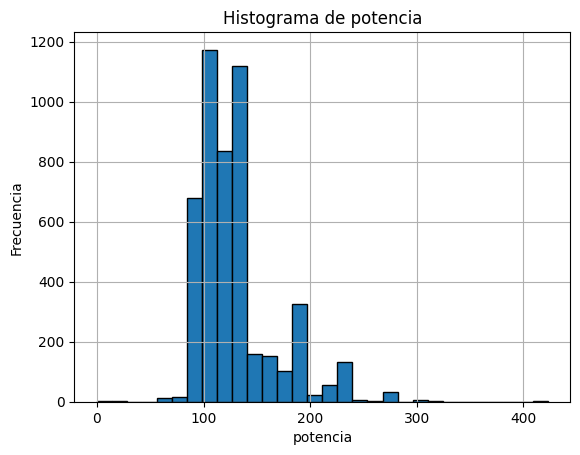

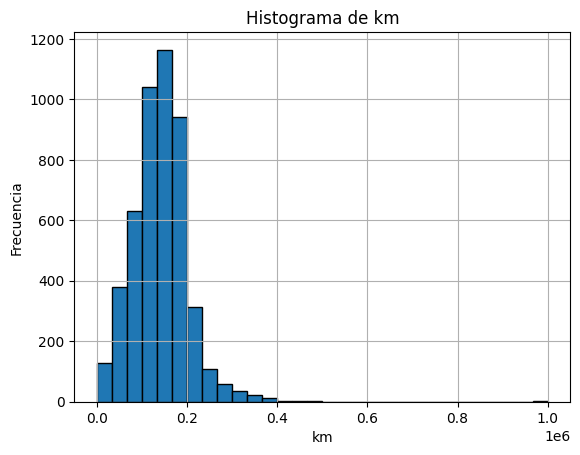

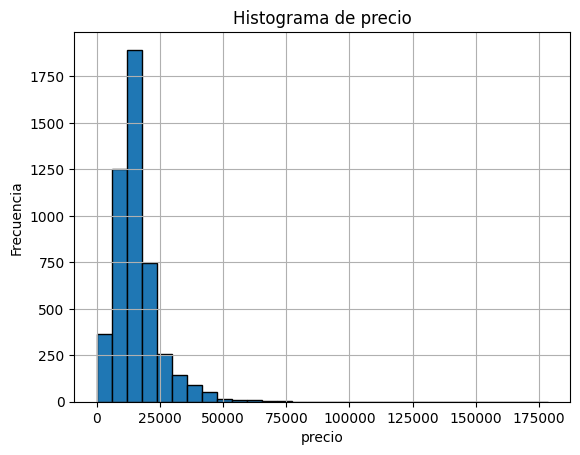

In [31]:
visualize_hist_multiple(df_bmw, ['potencia', 'km', 'precio'])

POTENCIA

In [32]:
df_bmw['potencia'].describe()

,potencia
count,4843.000000
mean,128.983068
std,38.990908
min,0.000000
25%,100.000000
50%,120.000000
75%,135.000000
max,423.000000


In [33]:
## Por conocimiento general sabemos que un coche no puede tener potencia '0' y luego de investigar hemos visto que la potencia minima para que se considere como una prestación digna es de 75CV
## y los coches arriba de 400CV son pocos y raros.
## así que eliminamos los outliers de la potencia

In [34]:
df_bmw.drop(df_bmw[((df_bmw["potencia"]<=75) | (df_bmw["potencia"]>=400))].index, inplace=True)

<Axes: >

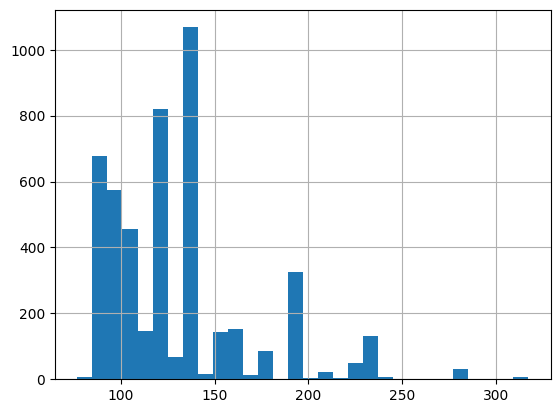

In [35]:
df_bmw['potencia'].hist(bins = 30)

KM

In [36]:
df_bmw['km'].describe()

,km
count,4.816000e+03
mean,1.412020e+05
std,6.001749e+04
min,-6.400000e+01
25%,1.033200e+05
50%,1.412870e+05
75%,1.752695e+05
max,1.000376e+06


<Axes: >

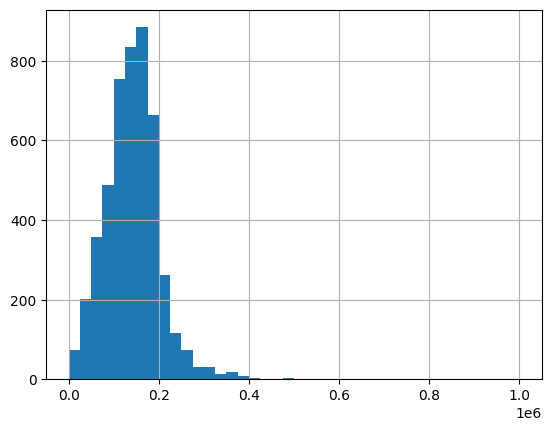

In [37]:
df_bmw['km'].hist(bins = 40)

<Axes: xlabel='km'>

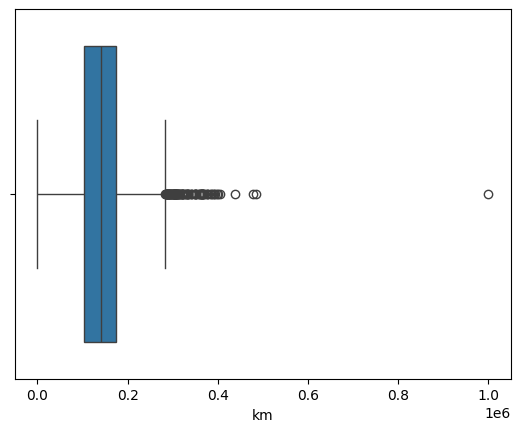

In [38]:
sns.boxplot(x = df_bmw['km'])

In [39]:
df_bmw.drop(df_bmw[((df_bmw["km"]<=0) | (df_bmw["km"]>=500000))].index, inplace=True)

<Axes: xlabel='km'>

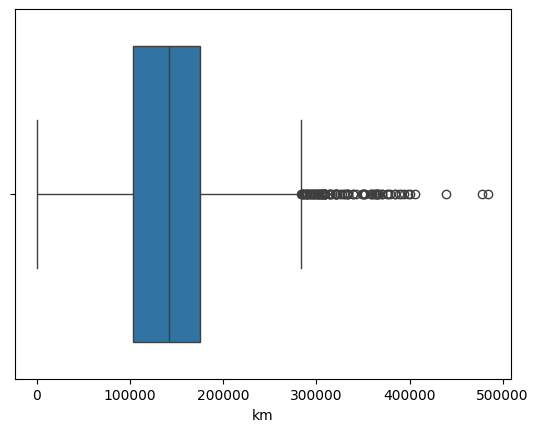

In [40]:
sns.boxplot(x = df_bmw['km'])

PRECIO

<Axes: xlabel='precio'>

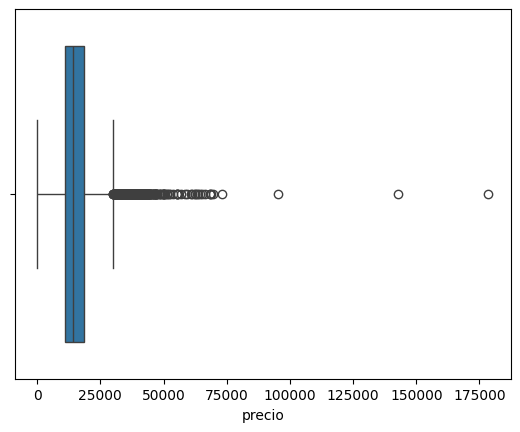

In [41]:
sns.boxplot(x = df_bmw['precio'])

In [42]:
## Creamos una variable 'LOG PRECIO' que este mejor distribuida

In [43]:
df_bmw["LOG_PRECIO"]=np.log10(df_bmw["precio"])

<Axes: xlabel='LOG_PRECIO'>

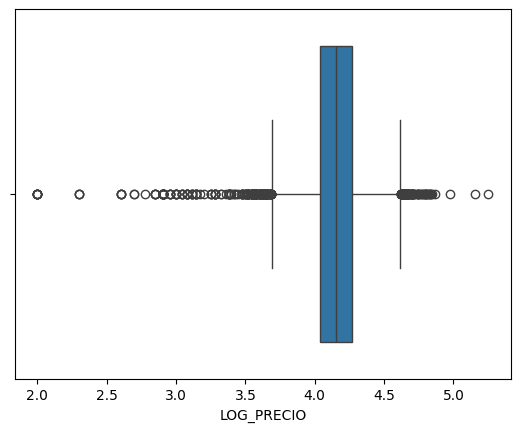

In [44]:
sns.boxplot(x = df_bmw['LOG_PRECIO'])

## BOOL A NUMERICAS

In [45]:
df_bmw.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,marca_modelo,LOG_PRECIO
0,140411.0,100.0,diesel,black,sin especificar,True,True,False,True,False,True,True,11300.0,2018-01-01,BMW 118,4.053078
1,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,BMW M4,4.843233
2,183297.0,120.0,diesel,white,sin especificar,False,False,False,True,False,True,False,10200.0,2018-02-01,BMW 320,4.008600
3,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,True,25100.0,2018-02-01,BMW 420,4.399674
4,97097.0,160.0,diesel,silver,sin especificar,True,True,False,False,True,True,True,33400.0,2018-04-01,BMW 425,4.523746


In [46]:
def bool_to_numeric(dataframe, columns):

    for col in columns:
      dataframe[col] = dataframe[col].astype('int64')

In [47]:
bool_to_numeric(df_bmw, ['elevalunas_electrico', 'volante_regulable', 'aire_acondicionado', 'bluetooth', 'alerta_lim_velocidad', 'camara_trasera', 'gps'])

In [48]:
df_bmw.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,marca_modelo,LOG_PRECIO
0,140411.0,100.0,diesel,black,sin especificar,1,1,0,1,0,1,1,11300.0,2018-01-01,BMW 118,4.053078
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2018-02-01,BMW M4,4.843233
2,183297.0,120.0,diesel,white,sin especificar,0,0,0,1,0,1,0,10200.0,2018-02-01,BMW 320,4.008600
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,2018-02-01,BMW 420,4.399674
4,97097.0,160.0,diesel,silver,sin especificar,1,1,0,0,1,1,1,33400.0,2018-04-01,BMW 425,4.523746


In [49]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4814 non-null   float64
 1   potencia              4814 non-null   float64
 2   tipo_gasolina         4814 non-null   object 
 3   color                 4814 non-null   object 
 4   tipo_coche            4814 non-null   object 
 5   volante_regulable     4814 non-null   int64  
 6   aire_acondicionado    4814 non-null   int64  
 7   camara_trasera        4814 non-null   int64  
 8   elevalunas_electrico  4814 non-null   int64  
 9   bluetooth             4814 non-null   int64  
 10  gps                   4814 non-null   int64  
 11  alerta_lim_velocidad  4814 non-null   int64  
 12  precio                4814 non-null   float64
 13  fecha_venta           4814 non-null   object 
 14  marca_modelo          4814 non-null   object 
 15  LOG_PRECIO            4814

## CORRELACIONES

In [50]:
df_bmw.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,marca_modelo,LOG_PRECIO
0,140411.0,100.0,diesel,black,sin especificar,1,1,0,1,0,1,1,11300.0,2018-01-01,BMW 118,4.053078
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2018-02-01,BMW M4,4.843233
2,183297.0,120.0,diesel,white,sin especificar,0,0,0,1,0,1,0,10200.0,2018-02-01,BMW 320,4.008600
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,2018-02-01,BMW 420,4.399674
4,97097.0,160.0,diesel,silver,sin especificar,1,1,0,0,1,1,1,33400.0,2018-04-01,BMW 425,4.523746


In [51]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4814 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   km                    4814 non-null   float64
 1   potencia              4814 non-null   float64
 2   tipo_gasolina         4814 non-null   object 
 3   color                 4814 non-null   object 
 4   tipo_coche            4814 non-null   object 
 5   volante_regulable     4814 non-null   int64  
 6   aire_acondicionado    4814 non-null   int64  
 7   camara_trasera        4814 non-null   int64  
 8   elevalunas_electrico  4814 non-null   int64  
 9   bluetooth             4814 non-null   int64  
 10  gps                   4814 non-null   int64  
 11  alerta_lim_velocidad  4814 non-null   int64  
 12  precio                4814 non-null   float64
 13  fecha_venta           4814 non-null   object 
 14  marca_modelo          4814 non-null   object 
 15  LOG_PRECIO            4814

In [52]:
corr = df_bmw.corr(numeric_only = True)

In [53]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,LOG_PRECIO
km,1.000000,-0.051849,0.063400,0.019354,0.003565,0.048072,-0.030571,0.160037,-0.037479,-0.414804,-0.433587
potencia,-0.051849,1.000000,0.323834,0.177870,0.312075,0.342429,0.205103,0.004991,0.426112,0.637246,0.506015
volante_regulable,0.063400,0.323834,1.000000,0.283862,0.253005,0.277839,0.126695,0.244511,0.186787,0.266177,0.248165
aire_acondicionado,0.019354,0.177870,0.283862,1.000000,0.142625,0.258933,0.104990,0.343409,0.169360,0.222609,0.301404
camara_trasera,0.003565,0.312075,0.253005,0.142625,1.000000,0.198197,0.126584,0.063480,0.166452,0.250601,0.198166
elevalunas_electrico,0.048072,0.342429,0.277839,0.258933,0.198197,1.000000,0.229980,0.203315,0.299635,0.264737,0.318491
bluetooth,-0.030571,0.205103,0.126695,0.104990,0.126584,0.229980,1.000000,0.114728,0.076922,0.186351,0.182132
gps,0.160037,0.004991,0.244511,0.343409,0.063480,0.203315,0.114728,1.000000,-0.053712,-0.008738,0.048357
alerta_lim_velocidad,-0.037479,0.426112,0.186787,0.169360,0.166452,0.299635,0.076922,-0.053712,1.000000,0.384216,0.361720
precio,-0.414804,0.637246,0.266177,0.222609,0.250601,0.264737,0.186351,-0.008738,0.384216,1.000000,0.808243


ANALIZAMOS EL PRECIO

In [54]:
df_bmw2 = df_bmw.copy()

In [55]:
df_bmw2.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,marca_modelo,LOG_PRECIO
0,140411.0,100.0,diesel,black,sin especificar,1,1,0,1,0,1,1,11300.0,2018-01-01,BMW 118,4.053078
1,13929.0,317.0,petrol,grey,convertible,1,1,0,0,1,1,1,69700.0,2018-02-01,BMW M4,4.843233
2,183297.0,120.0,diesel,white,sin especificar,0,0,0,1,0,1,0,10200.0,2018-02-01,BMW 320,4.008600
3,128035.0,135.0,diesel,red,convertible,1,1,0,1,1,1,1,25100.0,2018-02-01,BMW 420,4.399674
4,97097.0,160.0,diesel,silver,sin especificar,1,1,0,0,1,1,1,33400.0,2018-04-01,BMW 425,4.523746


array([[<Axes: title={'center': 'precio'}>]], dtype=object)

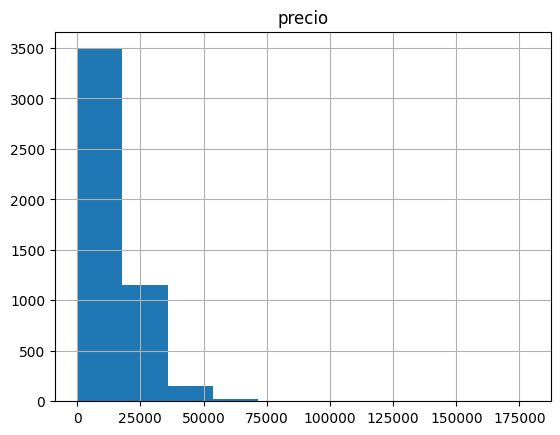

In [64]:
df_bmw2.hist('precio')

<Axes: xlabel='precio'>

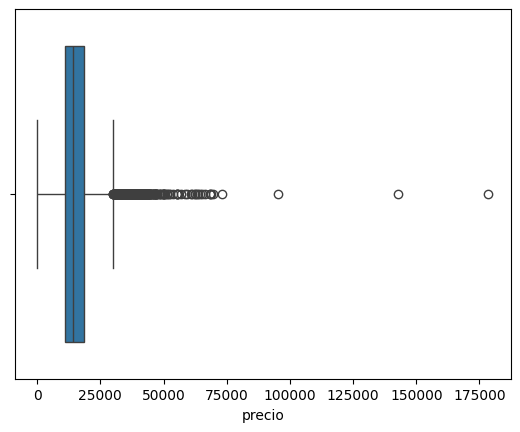

In [65]:
sns.boxplot(x = df_bmw2['precio'])

array([[<Axes: title={'center': 'LOG_PRECIO'}>]], dtype=object)

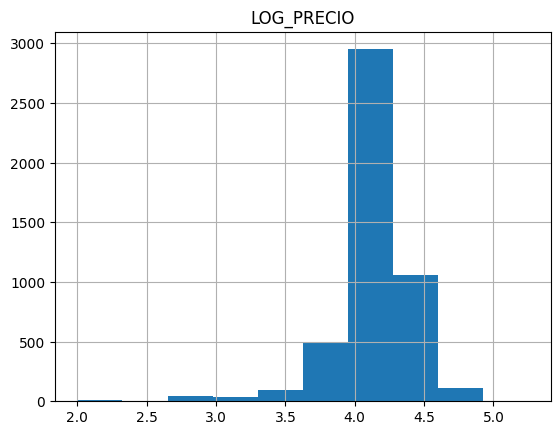

In [66]:
df_bmw2.hist('LOG_PRECIO')

<Axes: xlabel='LOG_PRECIO'>

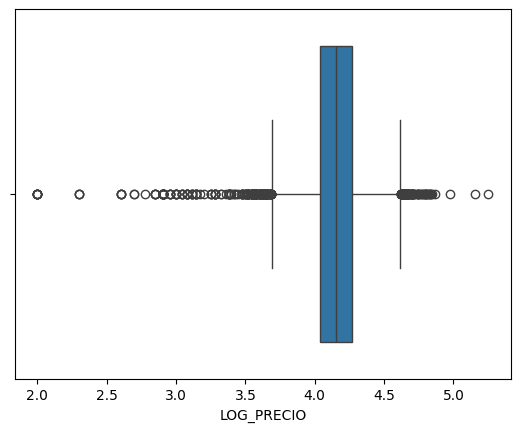

In [67]:
sns.boxplot(x = df_bmw2['LOG_PRECIO'])

In [68]:
## Analizando el precio podemos observar que aun obteniendo el LOG del precio no esta lo suficientemente distribuida.
## Para ayudar a la distribución y reducir el sesgo obtendremos la raíz del precio

<Axes: xlabel='PRECIO_RAIZ'>

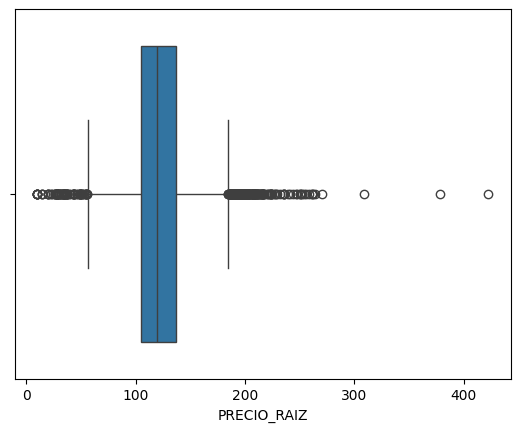

In [69]:
df_bmw2['PRECIO_RAIZ'] = df_bmw2['precio'] ** 0.5
sns.boxplot(x = df_bmw2['PRECIO_RAIZ'])

ESTUDIAMOS LAS VARIABLES EN RELACIÓN CON EL TARGET


In [61]:
def visualize_data(dataframe, target):

    for i in dataframe.columns:
        if i == target:
            continue

        if dataframe[i].dtype.kind in ('O', 'b'):
            plt.figure(figsize=(20, 6))
            sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")
            plt.title(f"Gráfico de violín para {i} vs {target}")
            plt.xlabel(i)
            plt.ylabel(target)
            plt.show()

        elif dataframe[i].dtype.kind in ('i', 'f'):
            plt.figure(figsize=(20, 6))
            sns.scatterplot(x=i, y=target, data=dataframe, hue=target, palette="coolwarm", alpha=0.6)
            plt.title(f"Gráfico de dispersión para {i} vs {target}")
            plt.xlabel(i)
            plt.ylabel(target)
            plt.show()

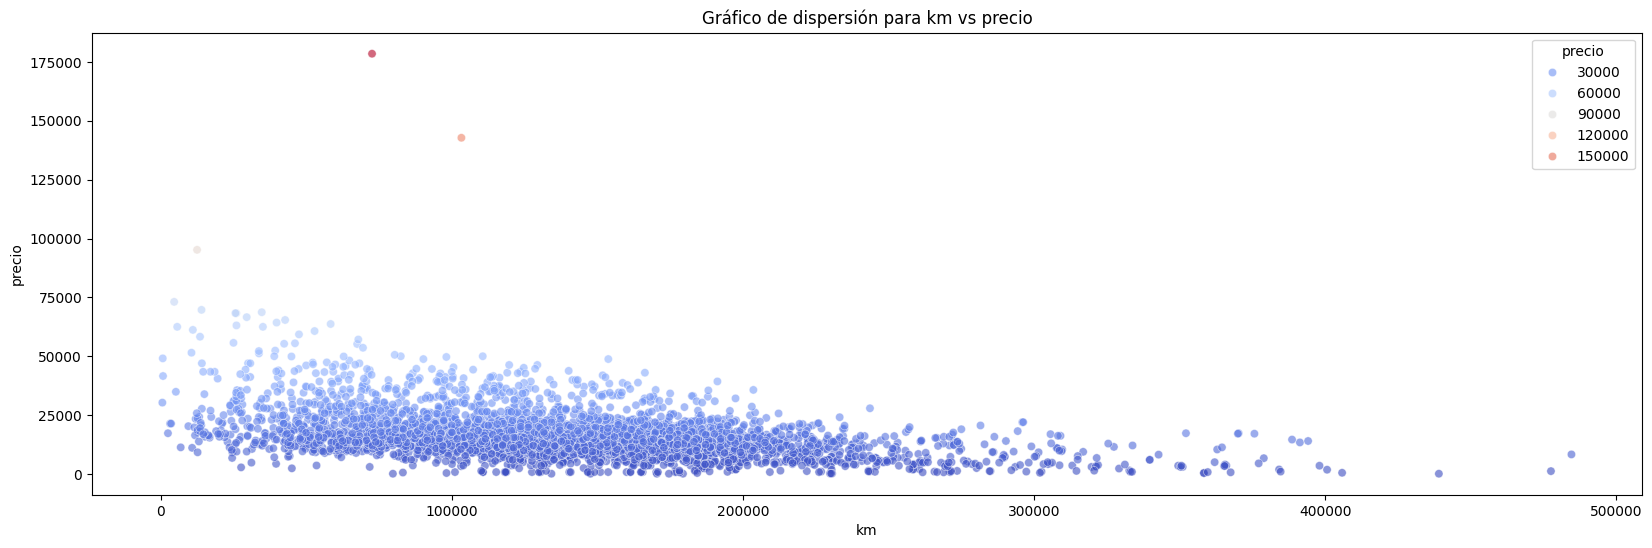

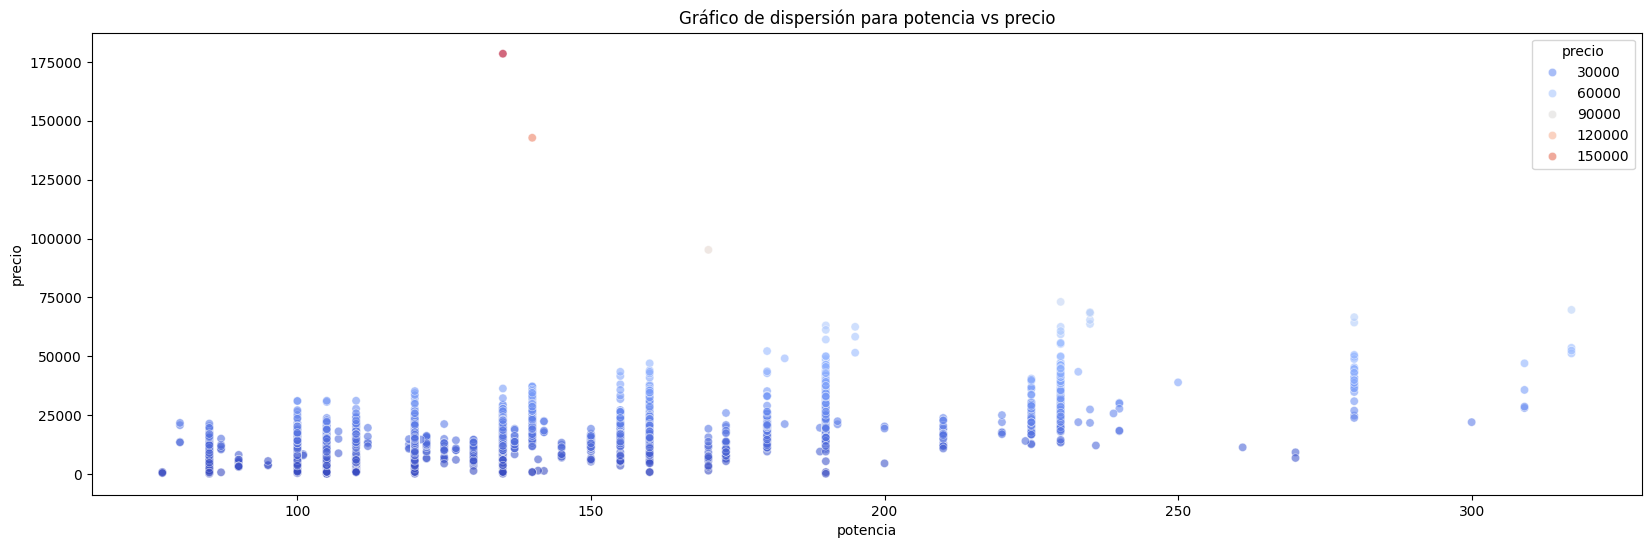

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


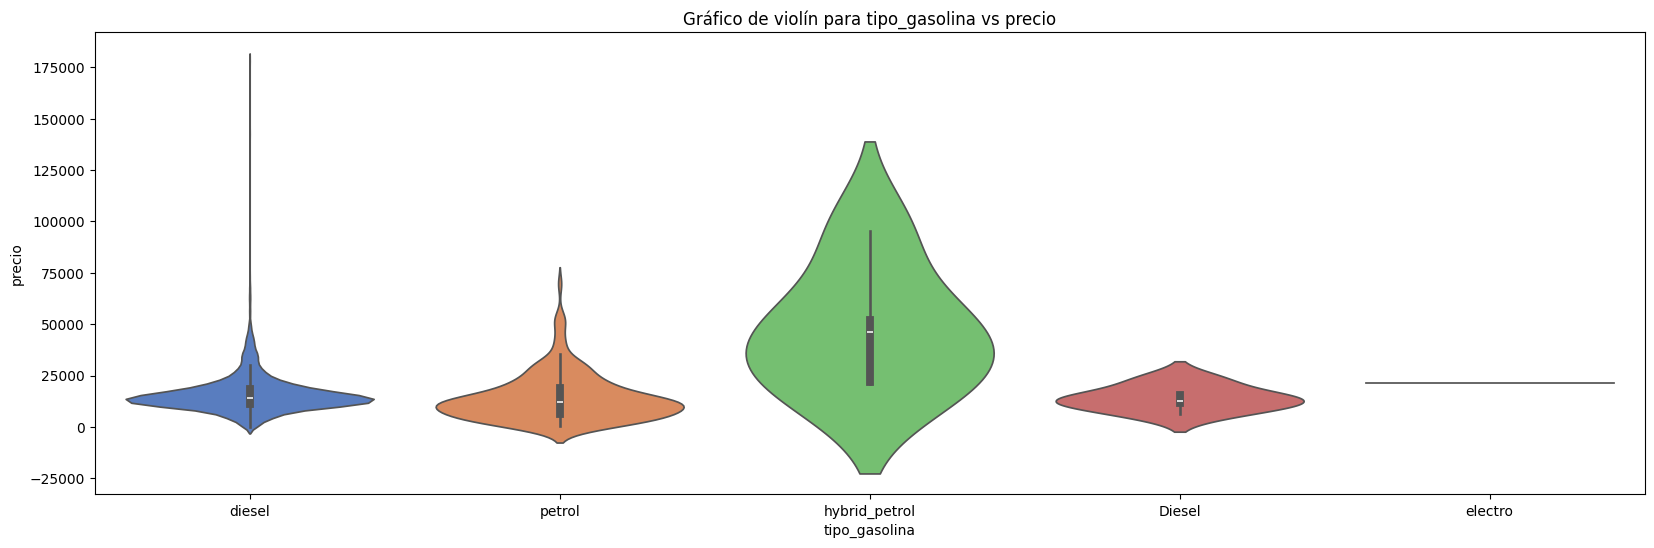

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


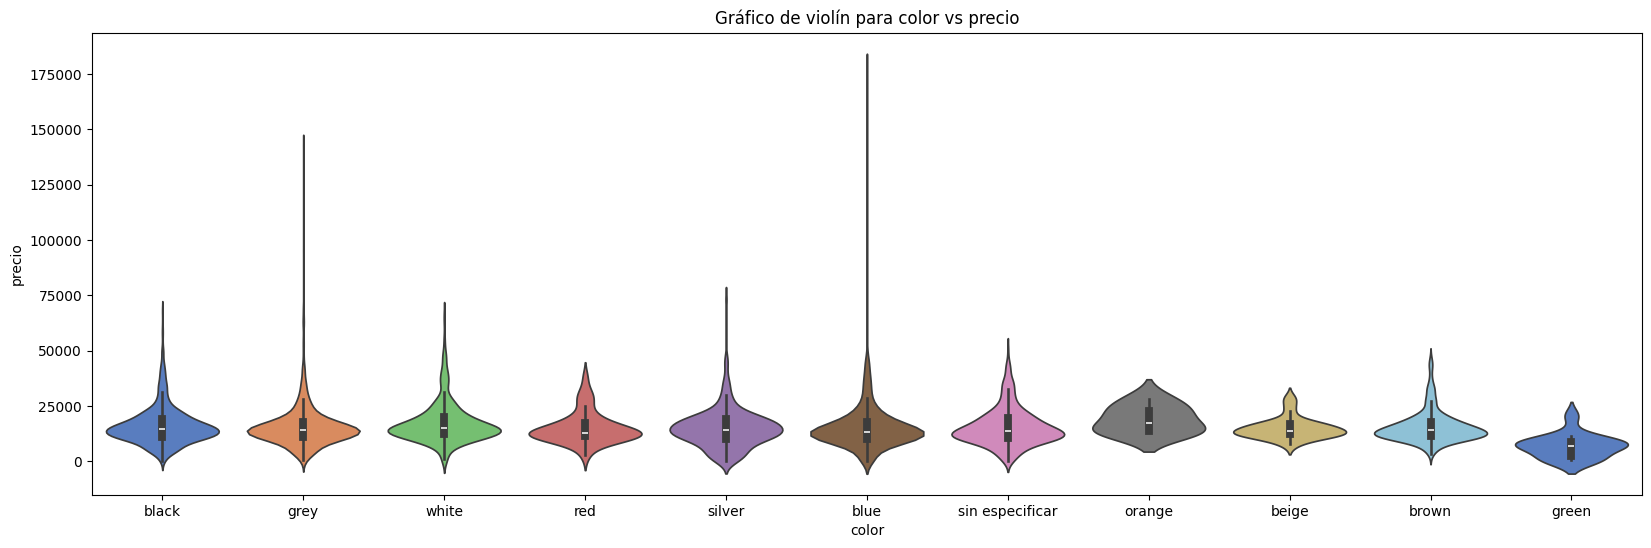

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


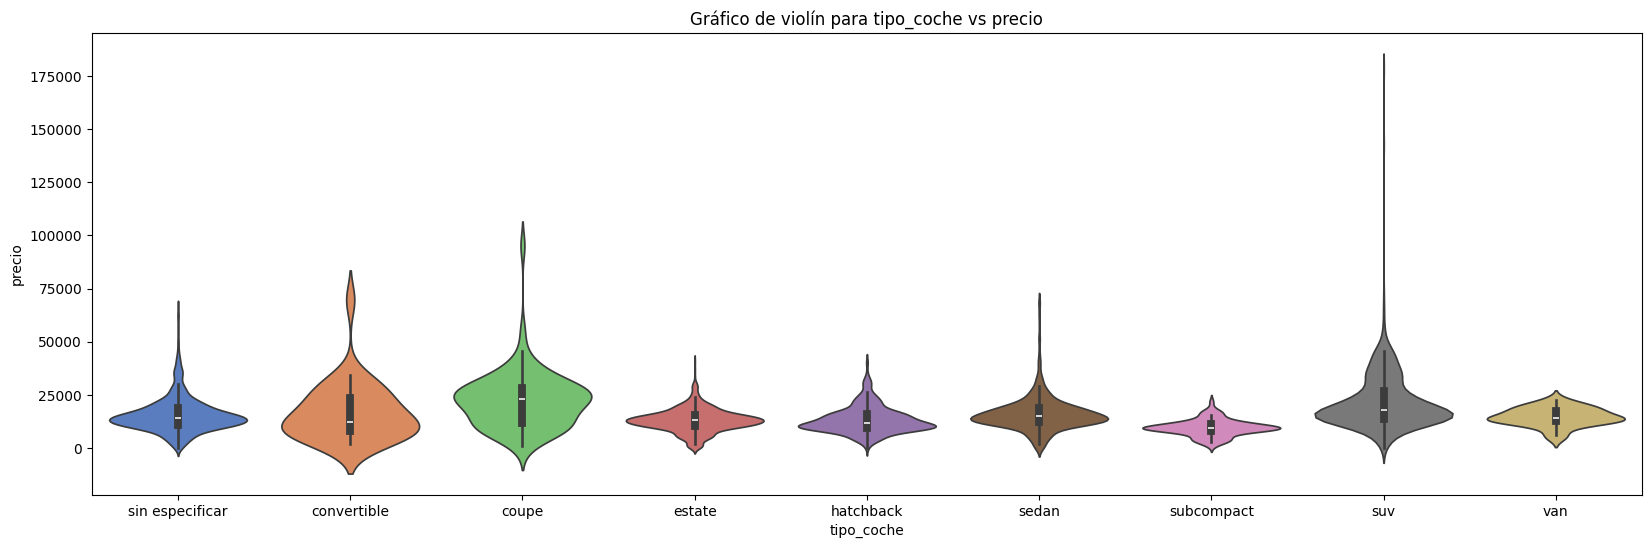

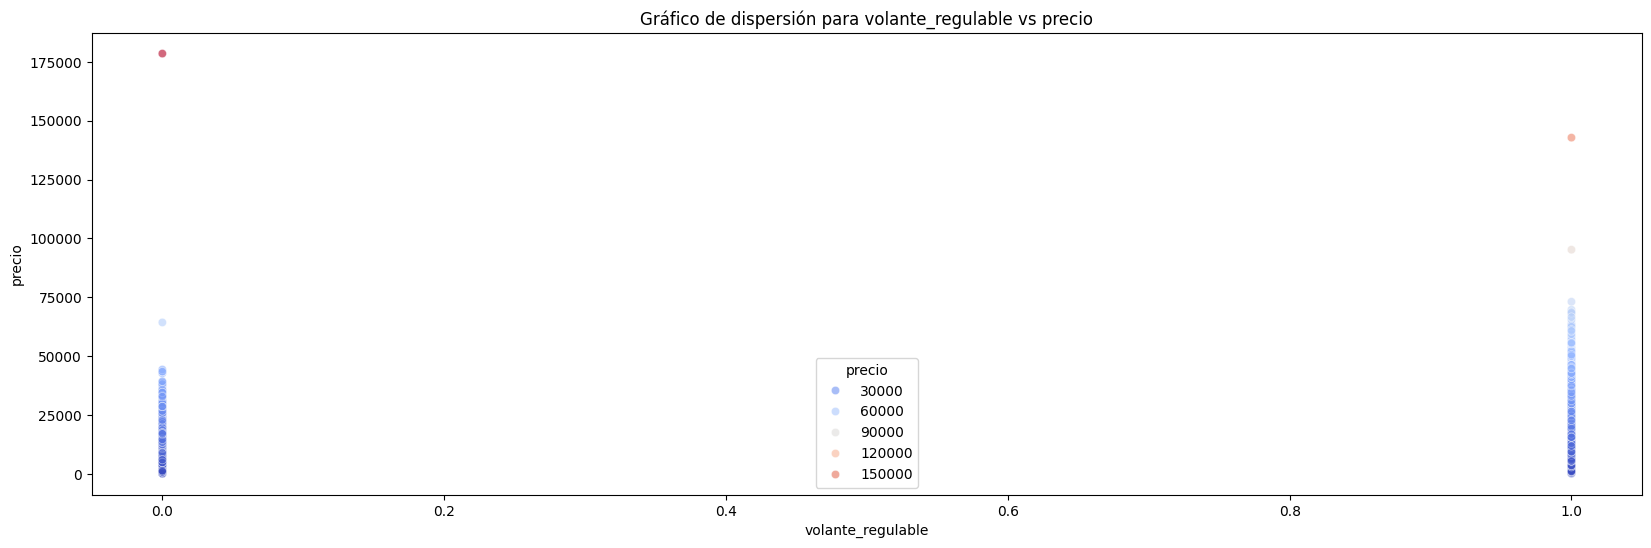

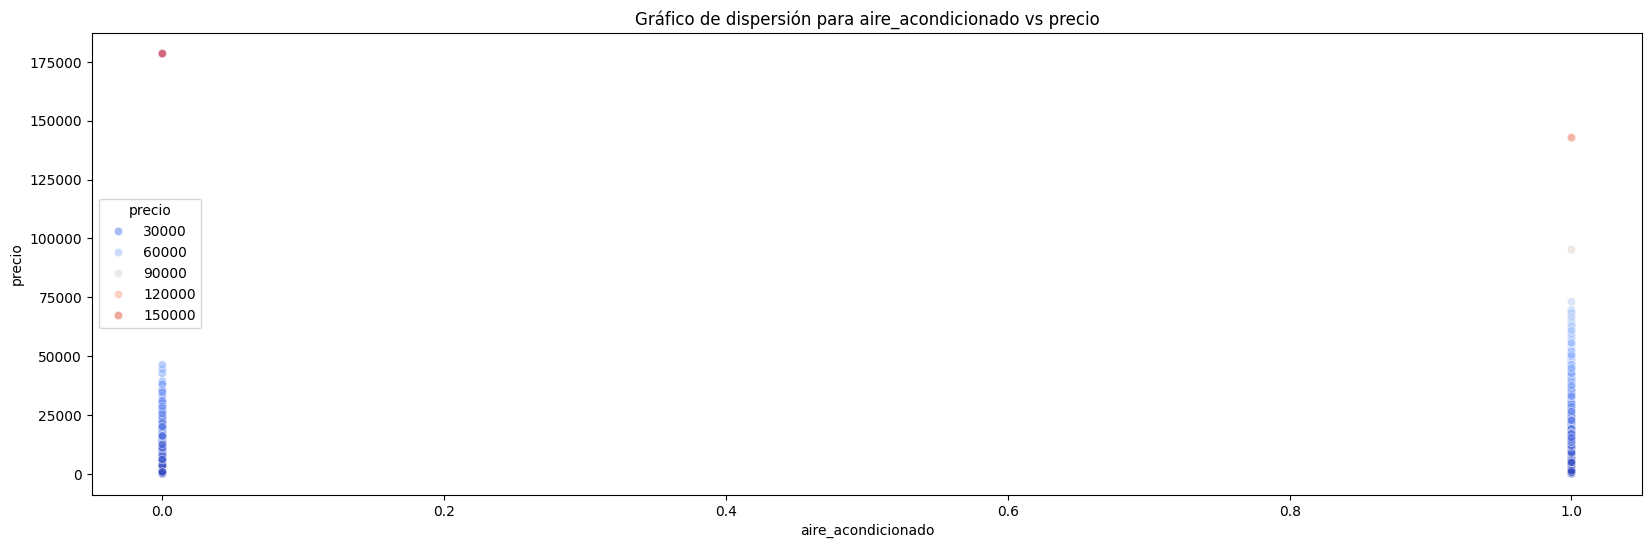

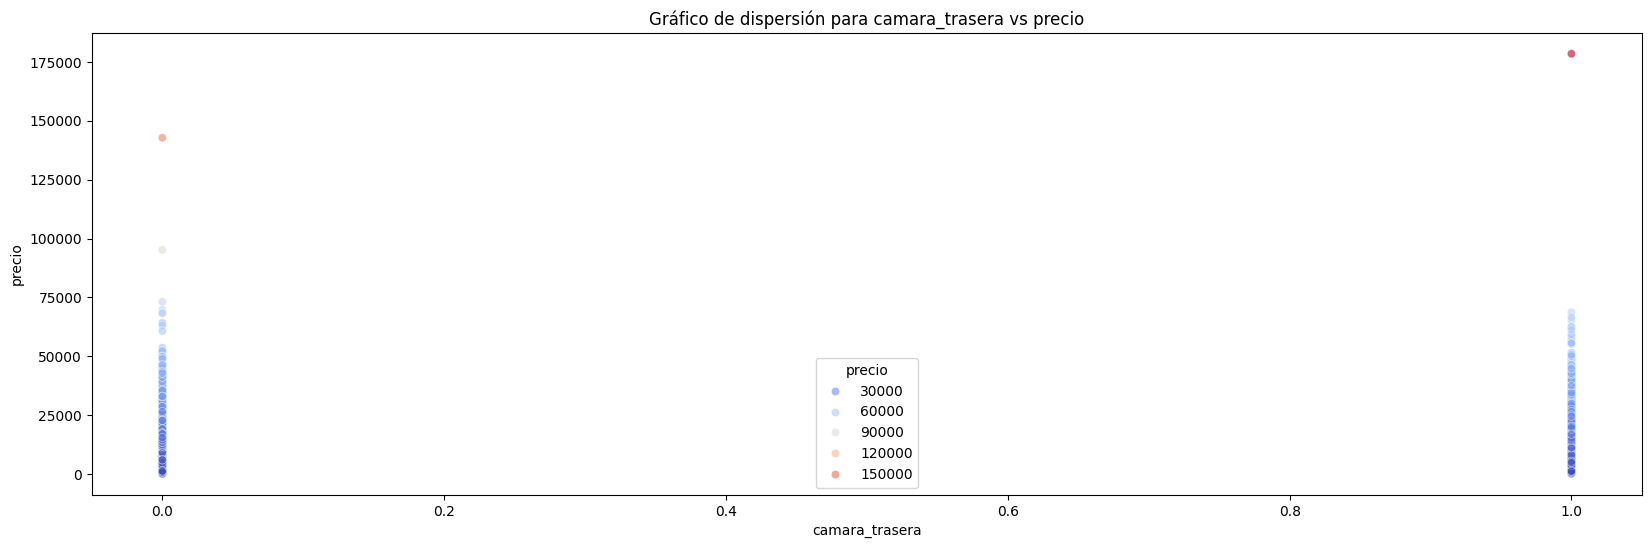

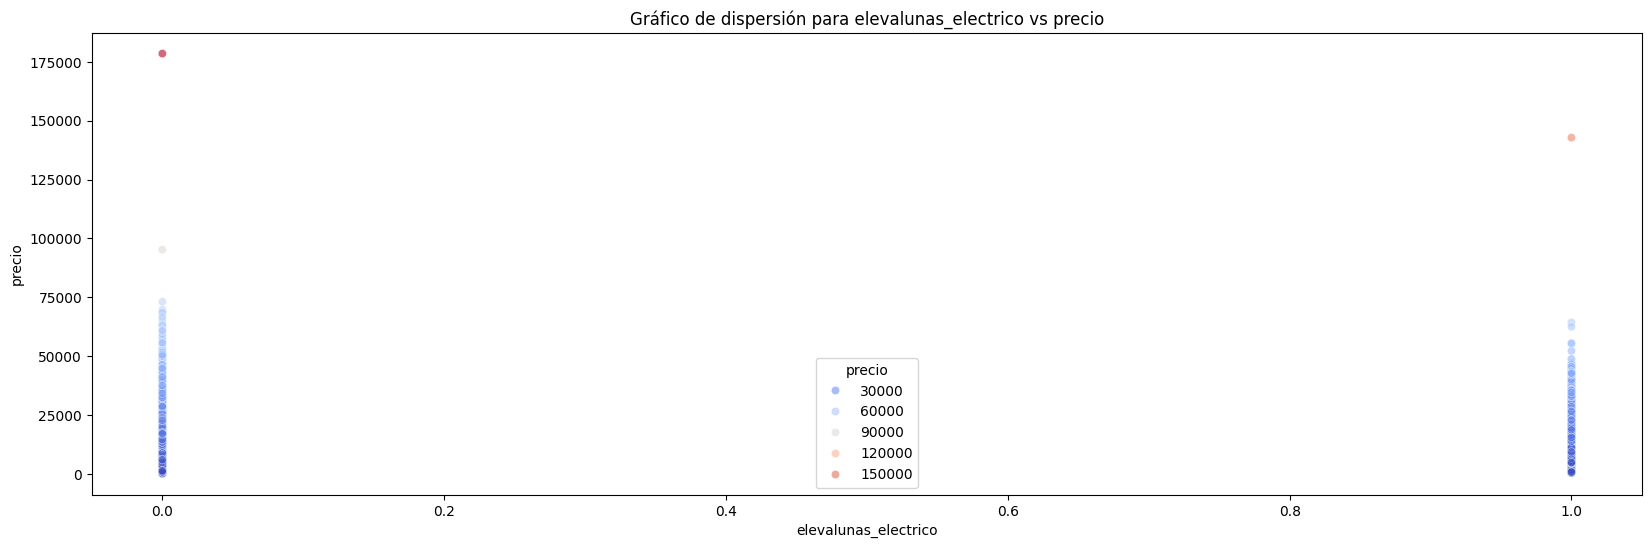

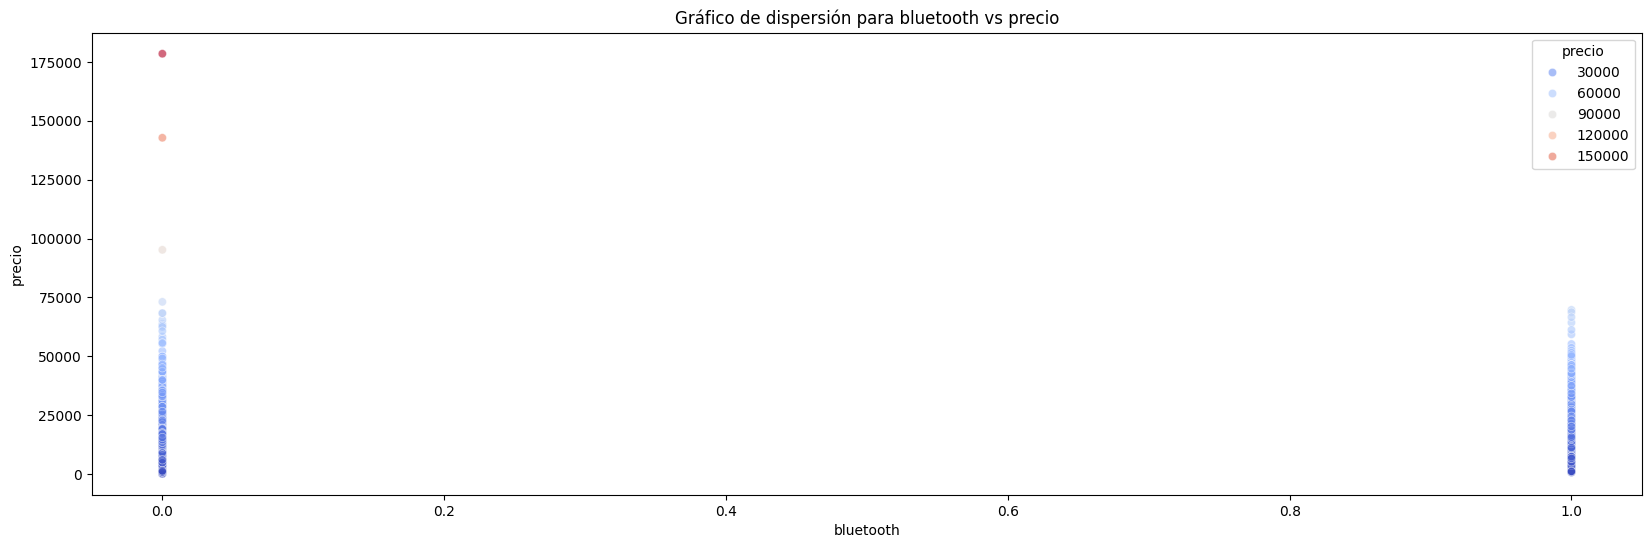

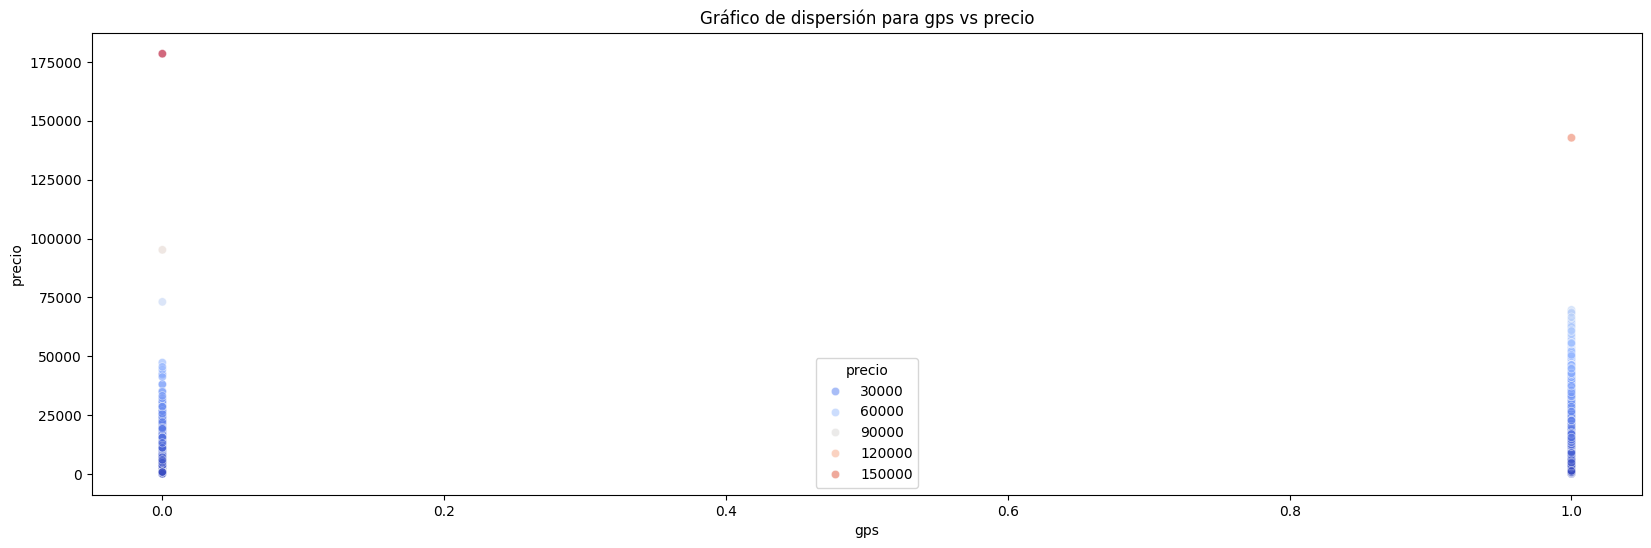

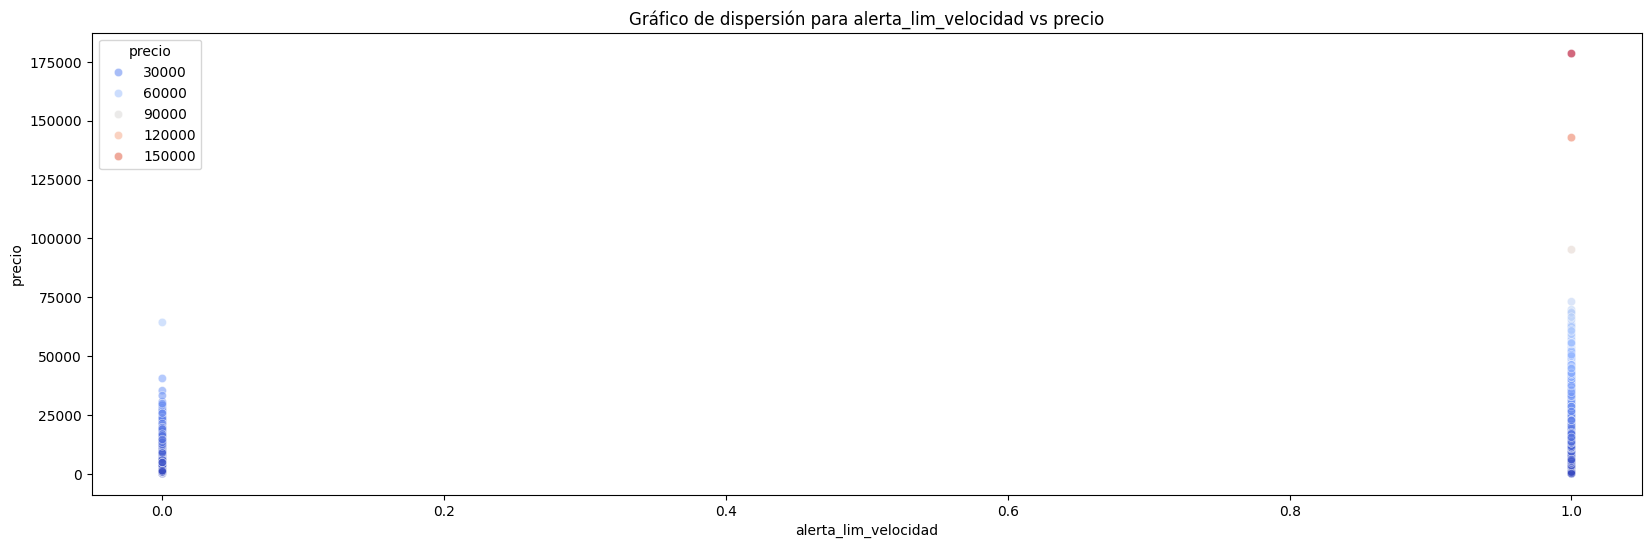

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


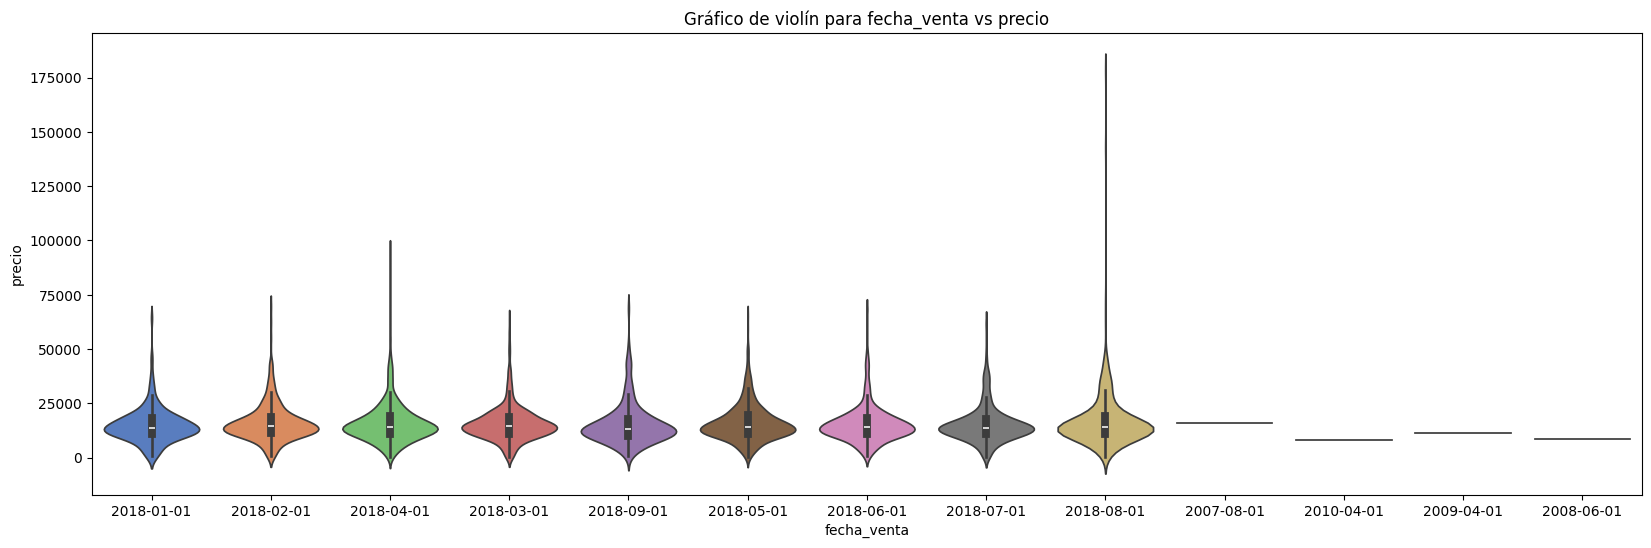

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


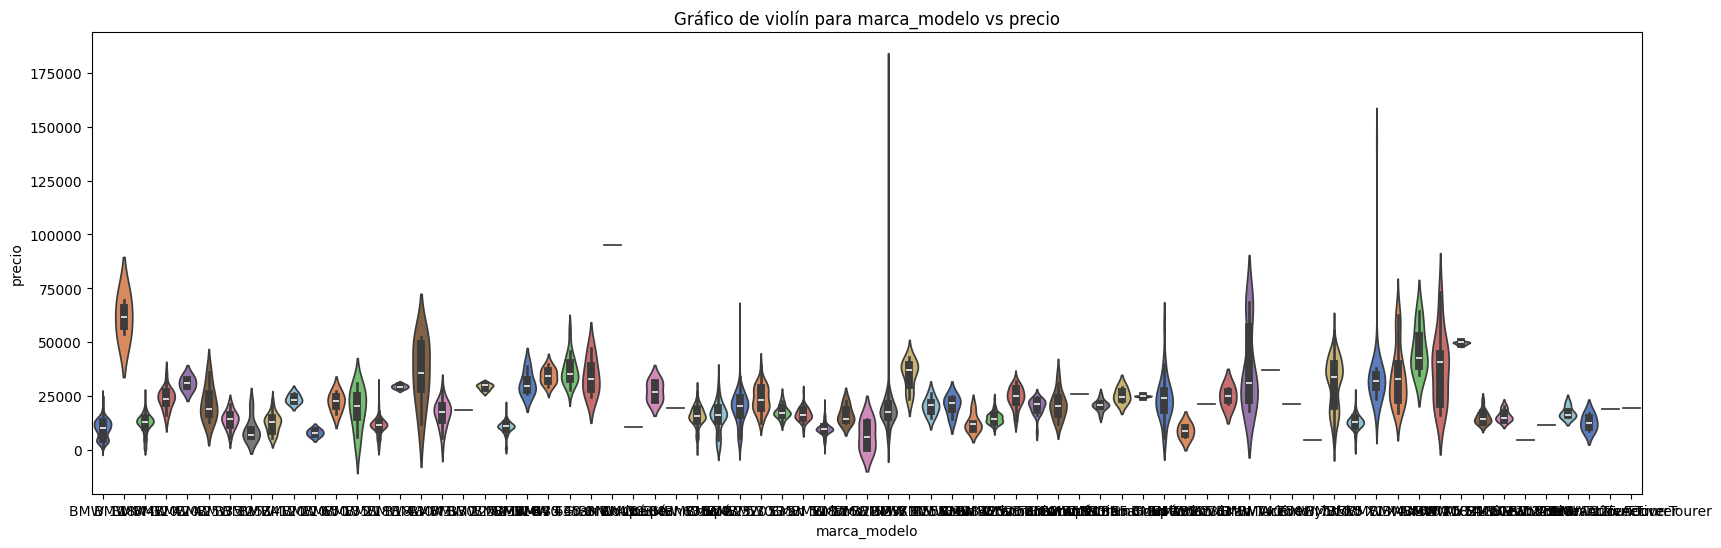

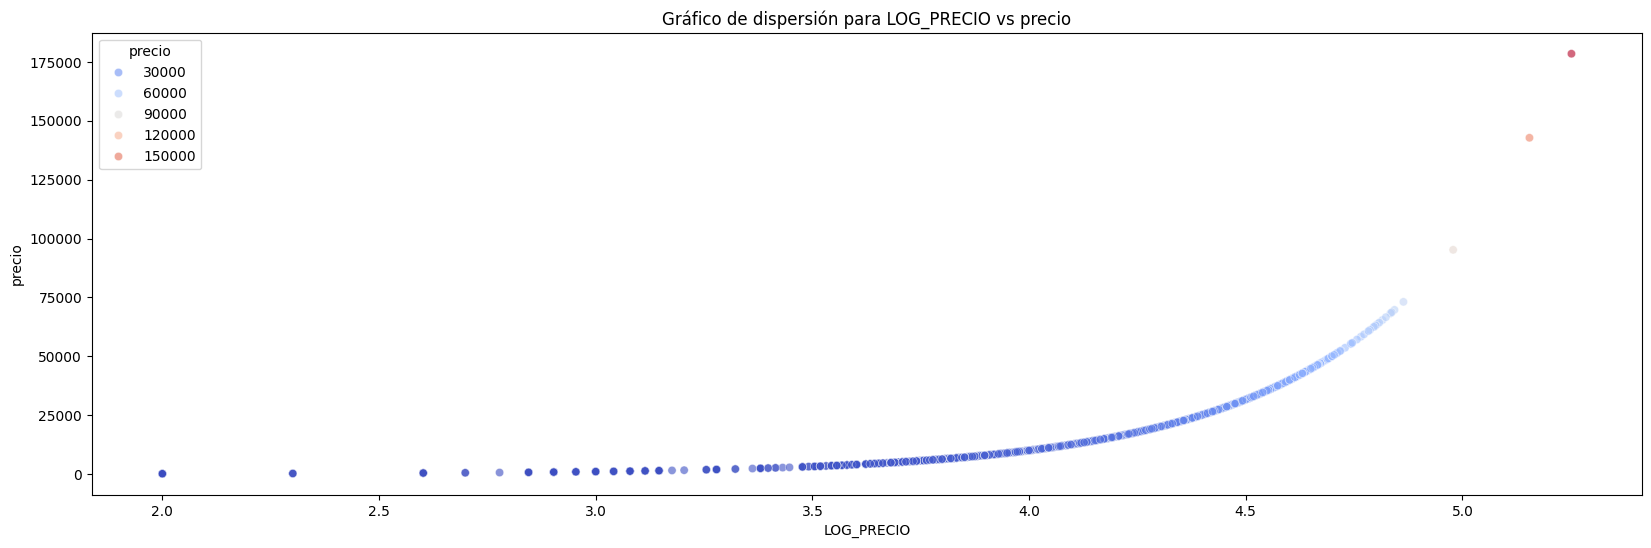

In [62]:
visualize_data(df_bmw2, 'precio')

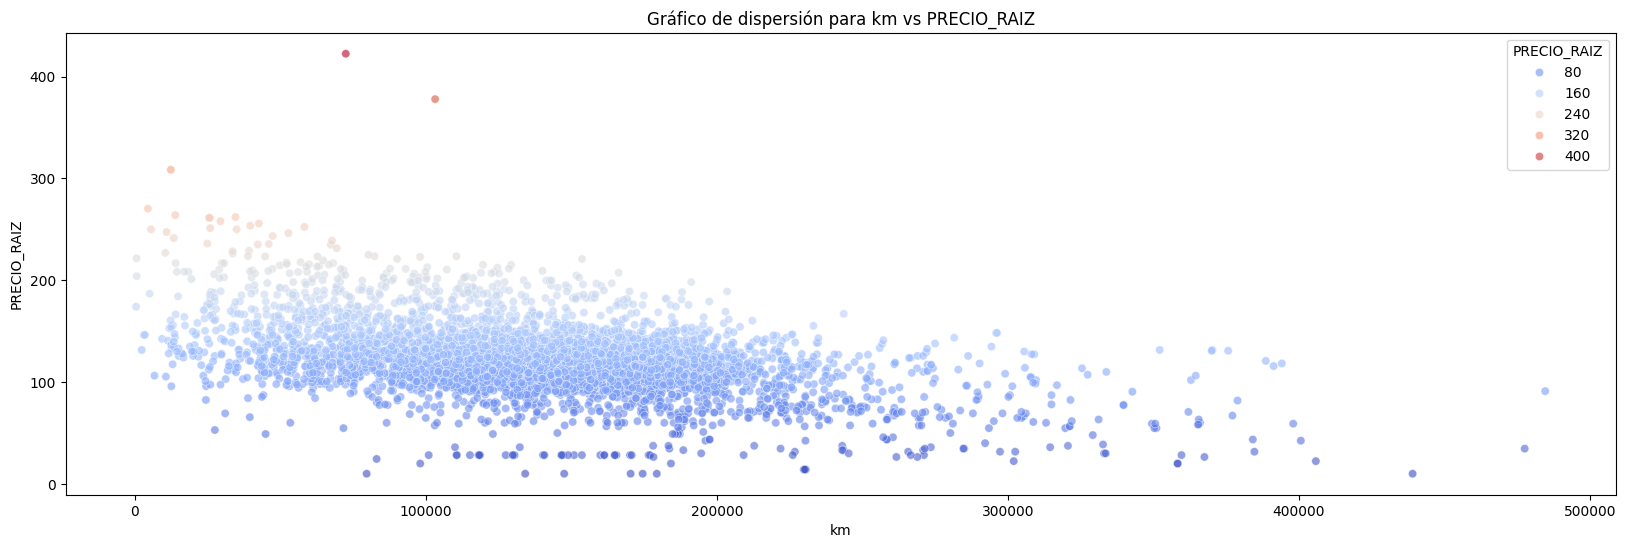

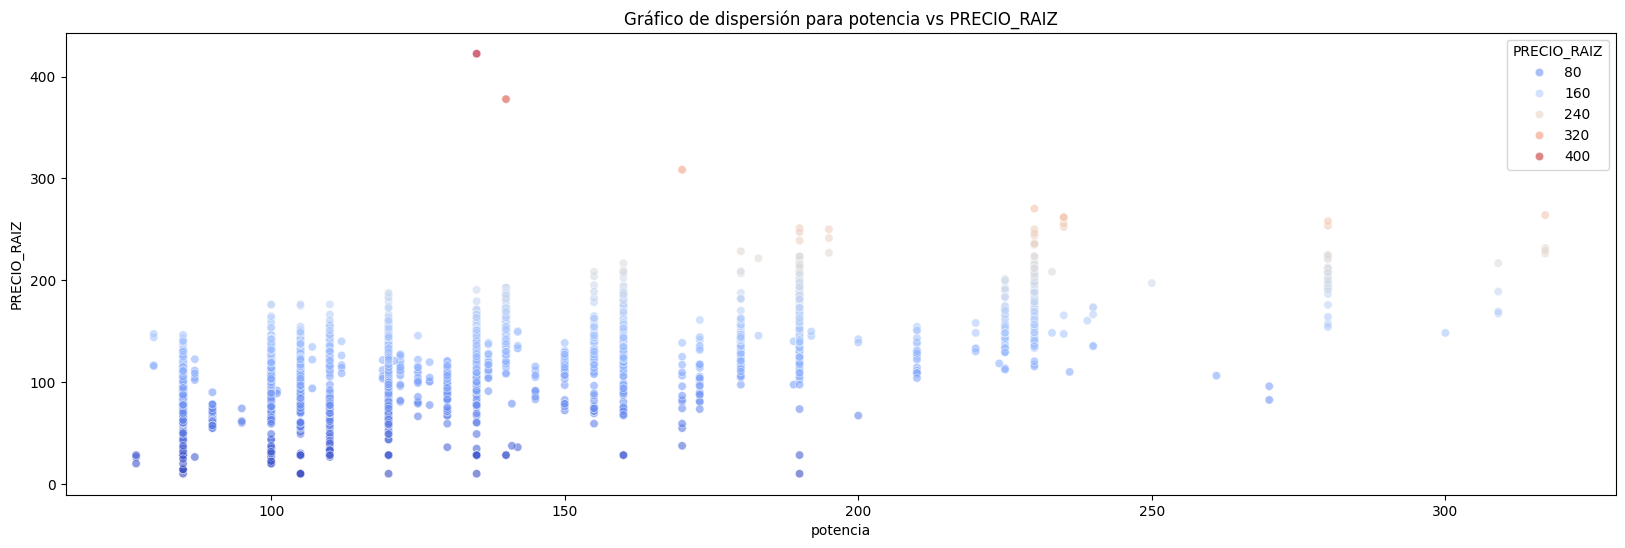

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


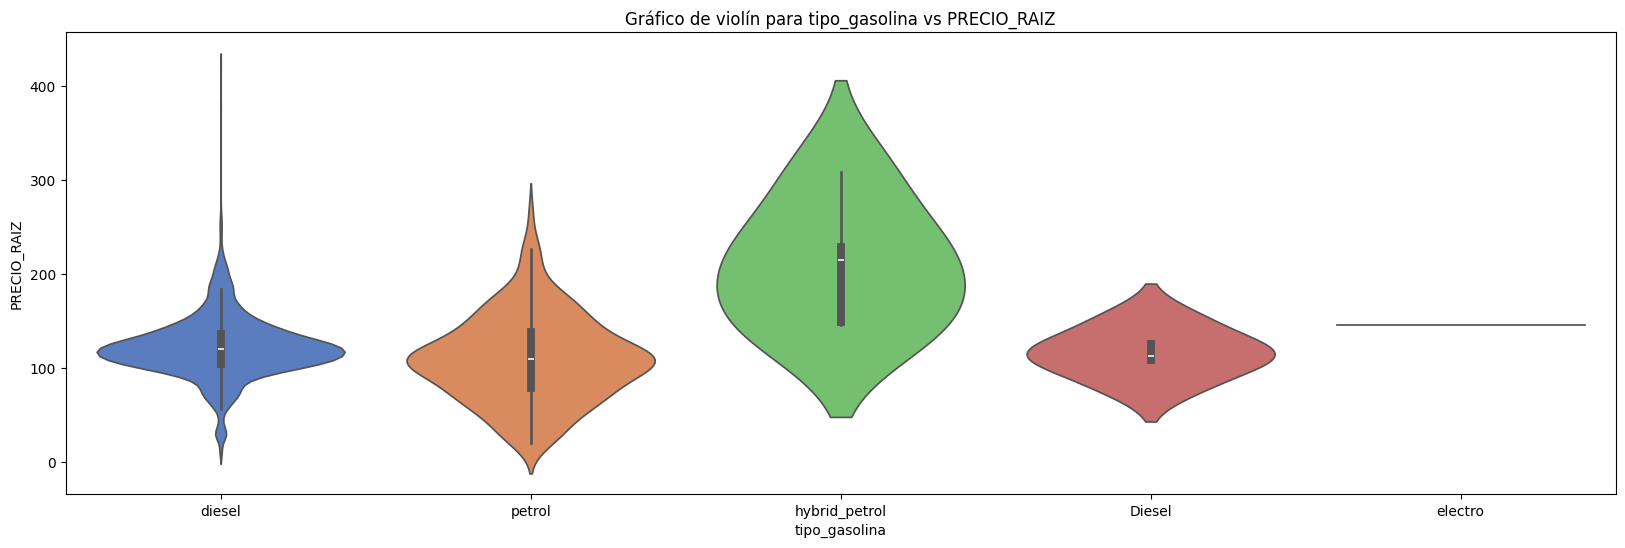

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


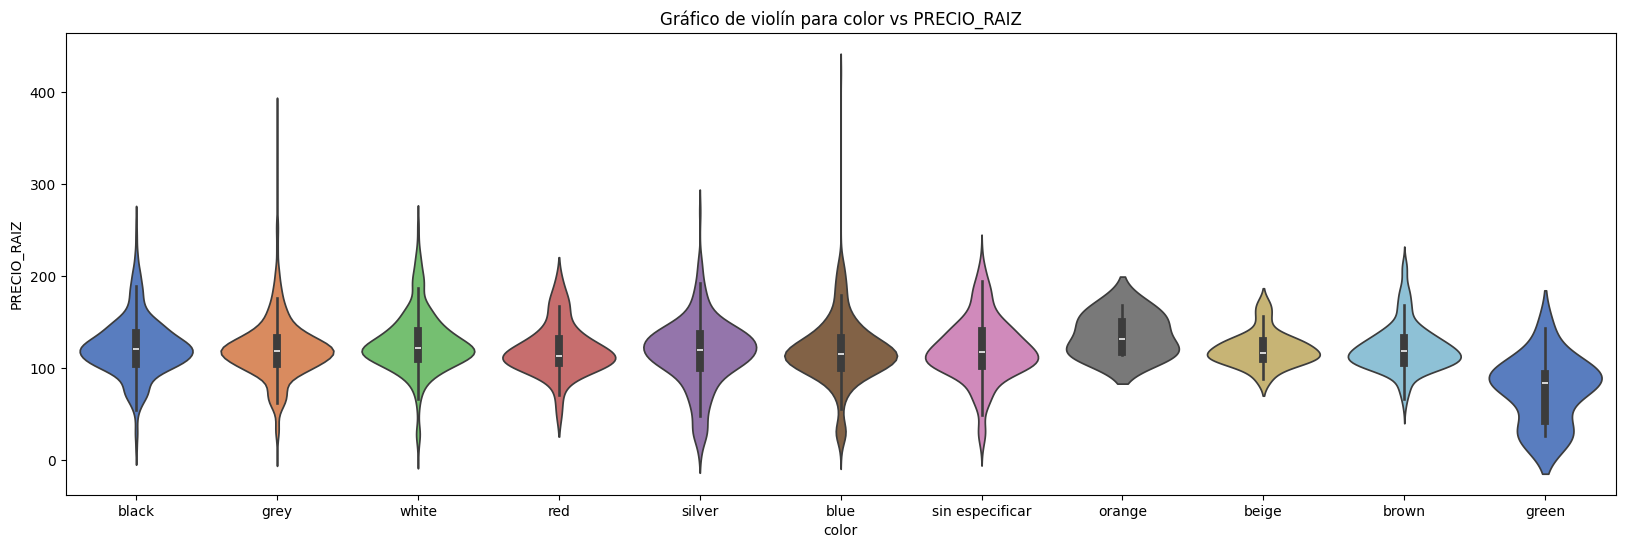

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


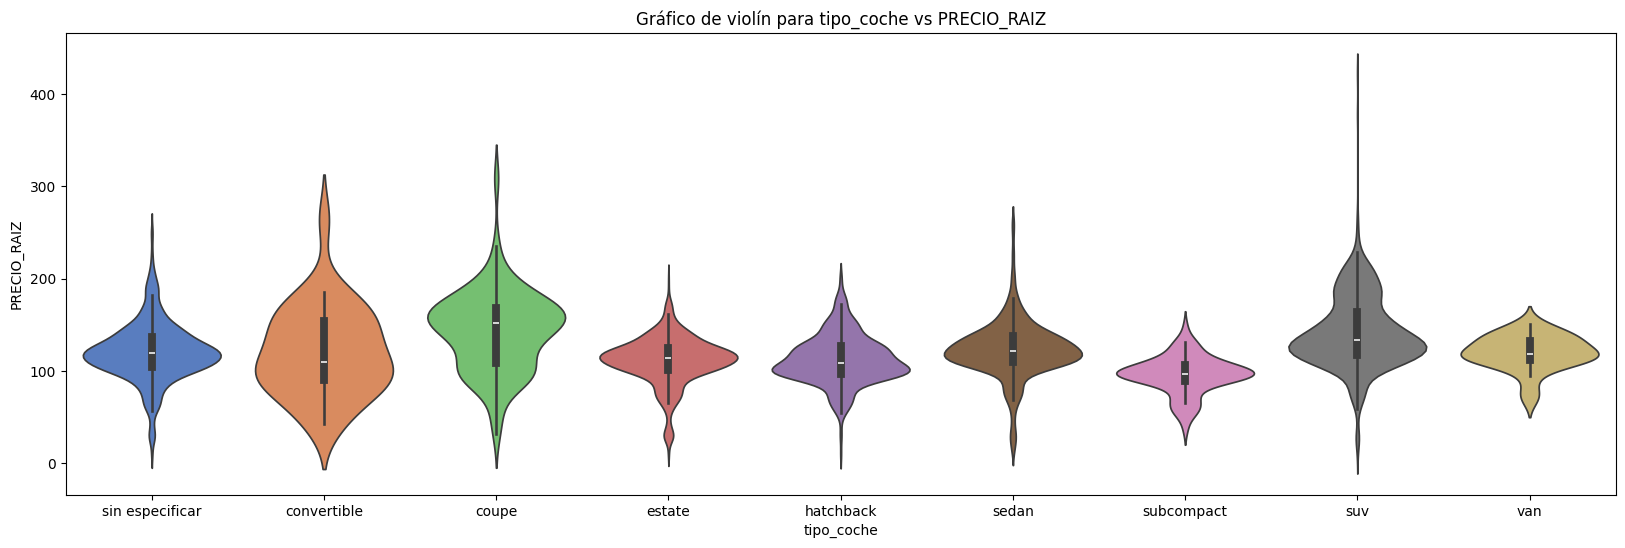

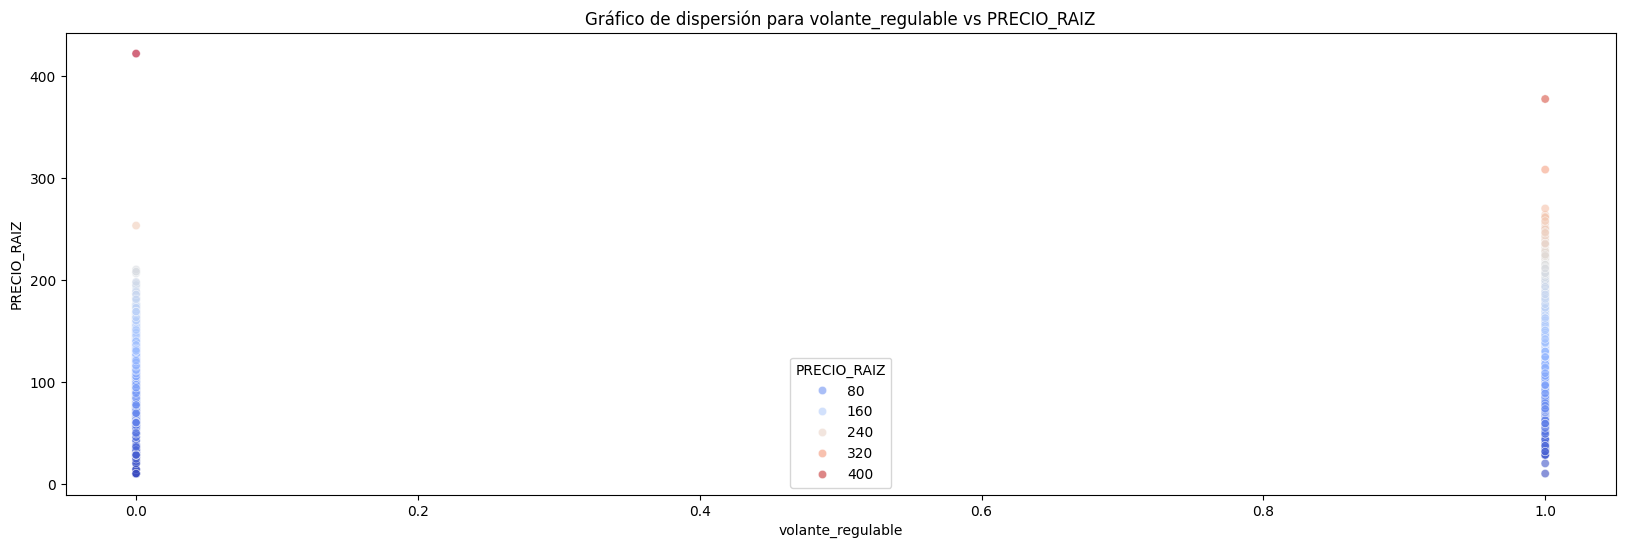

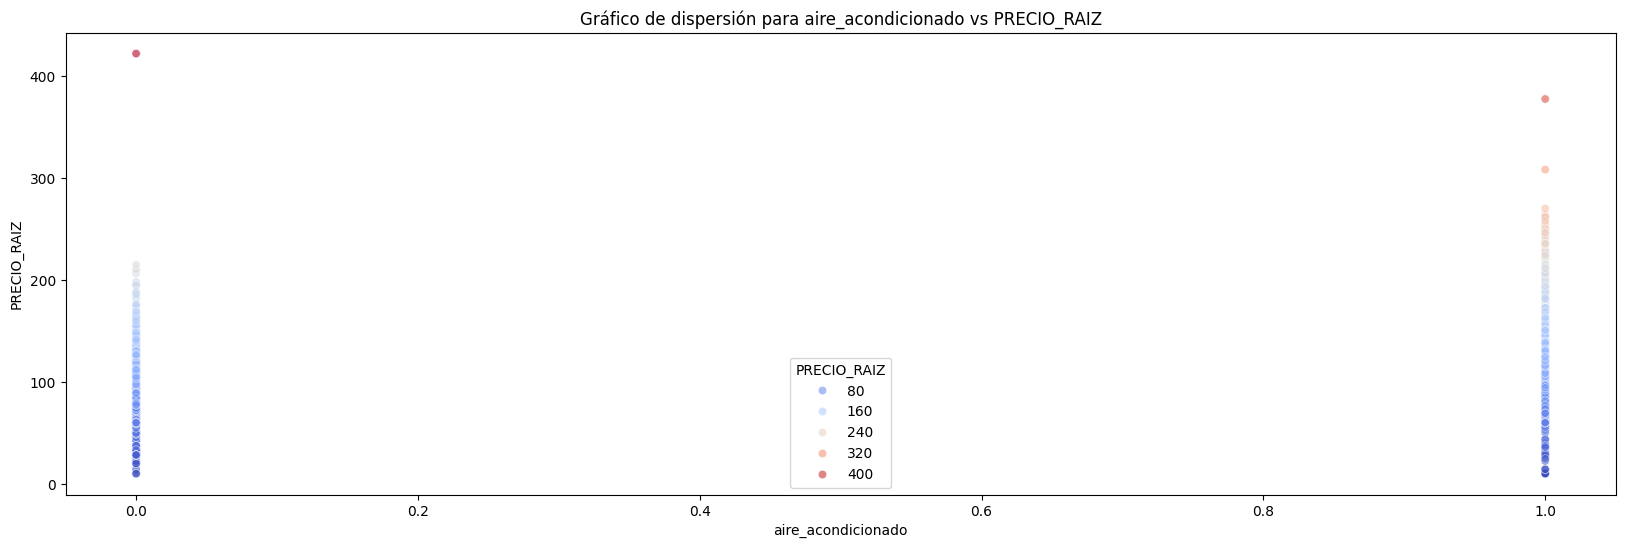

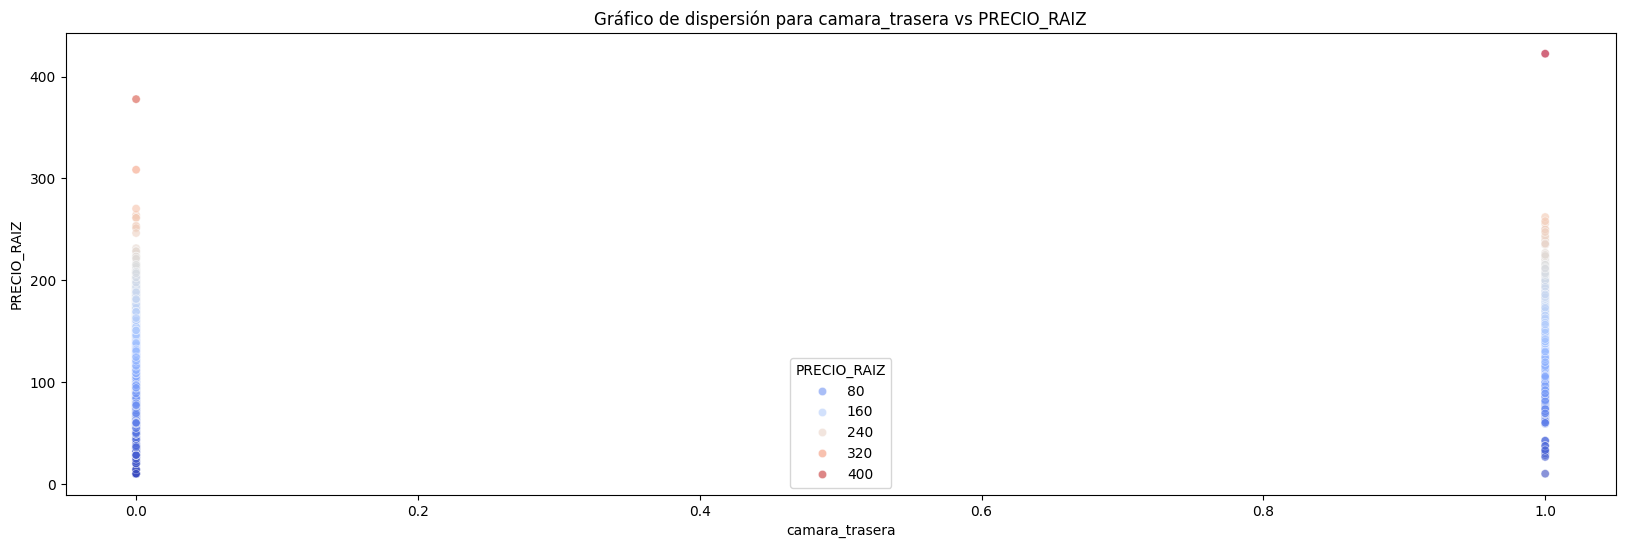

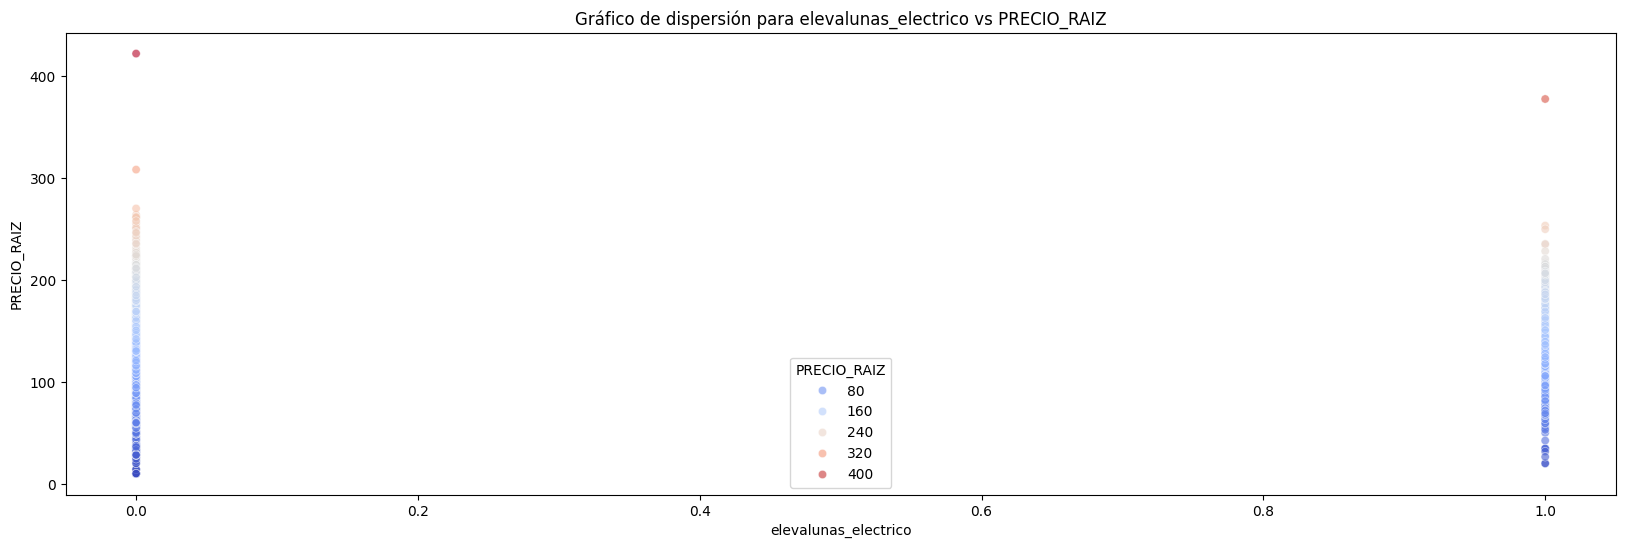

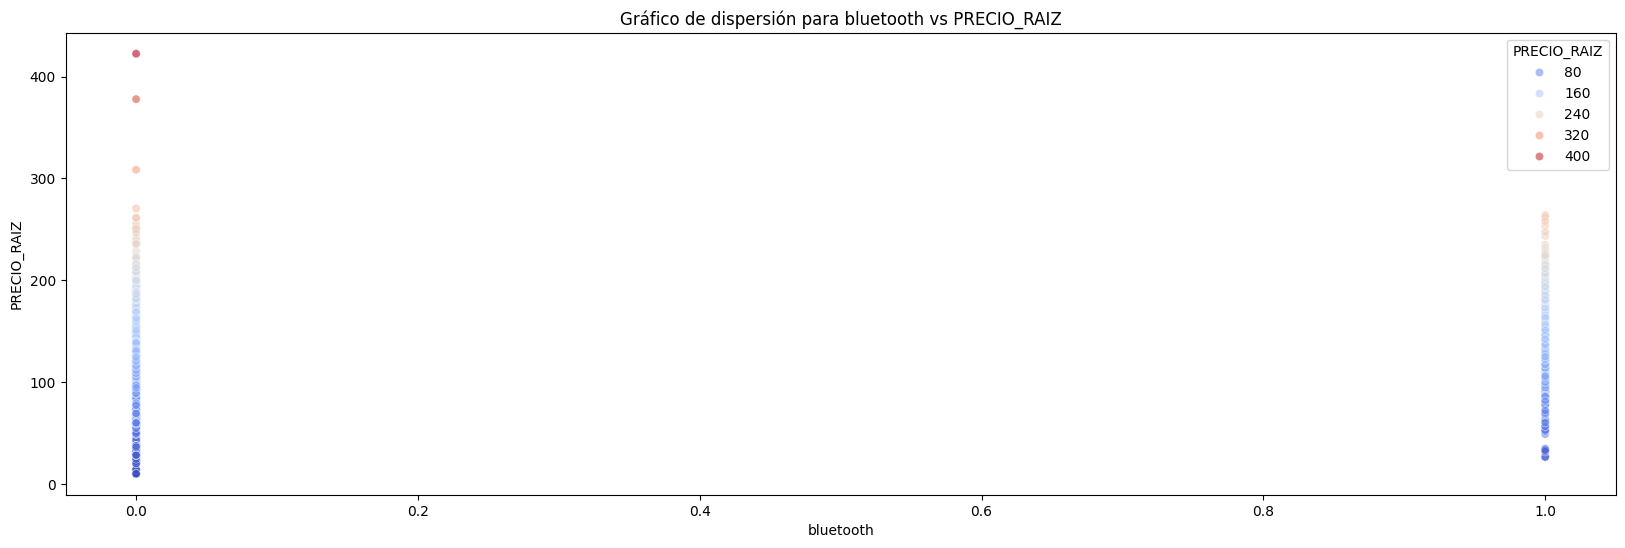

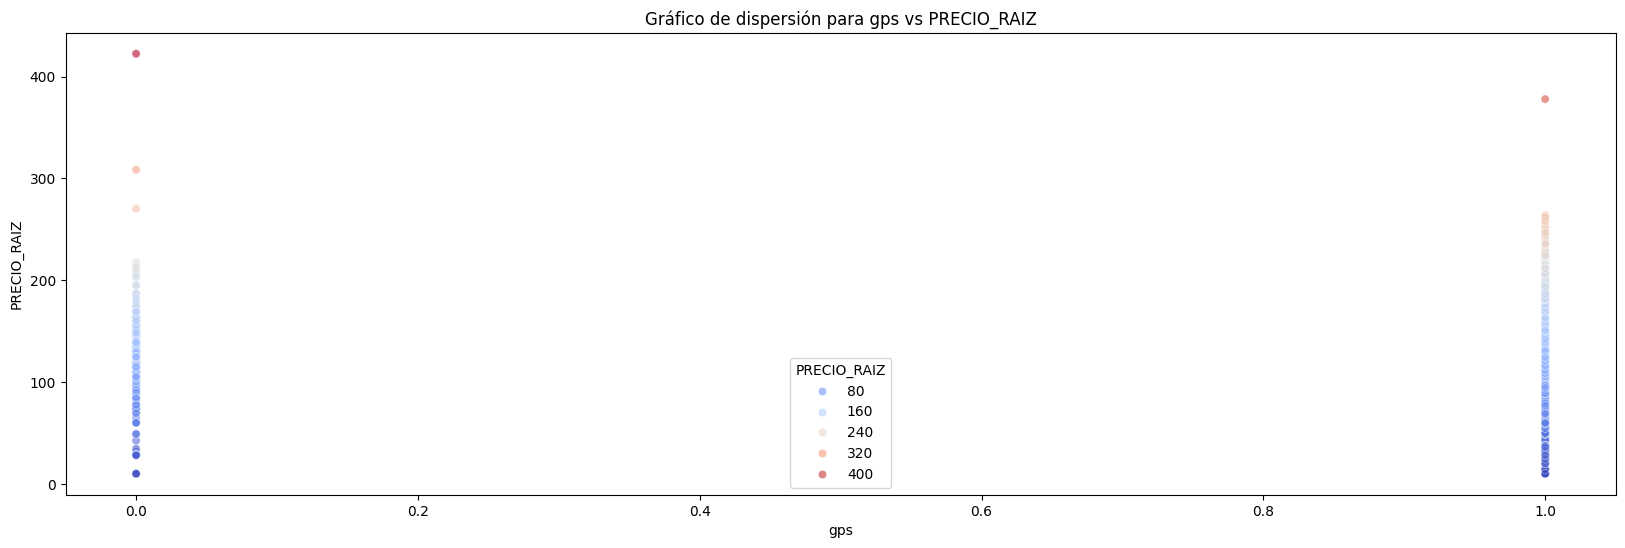

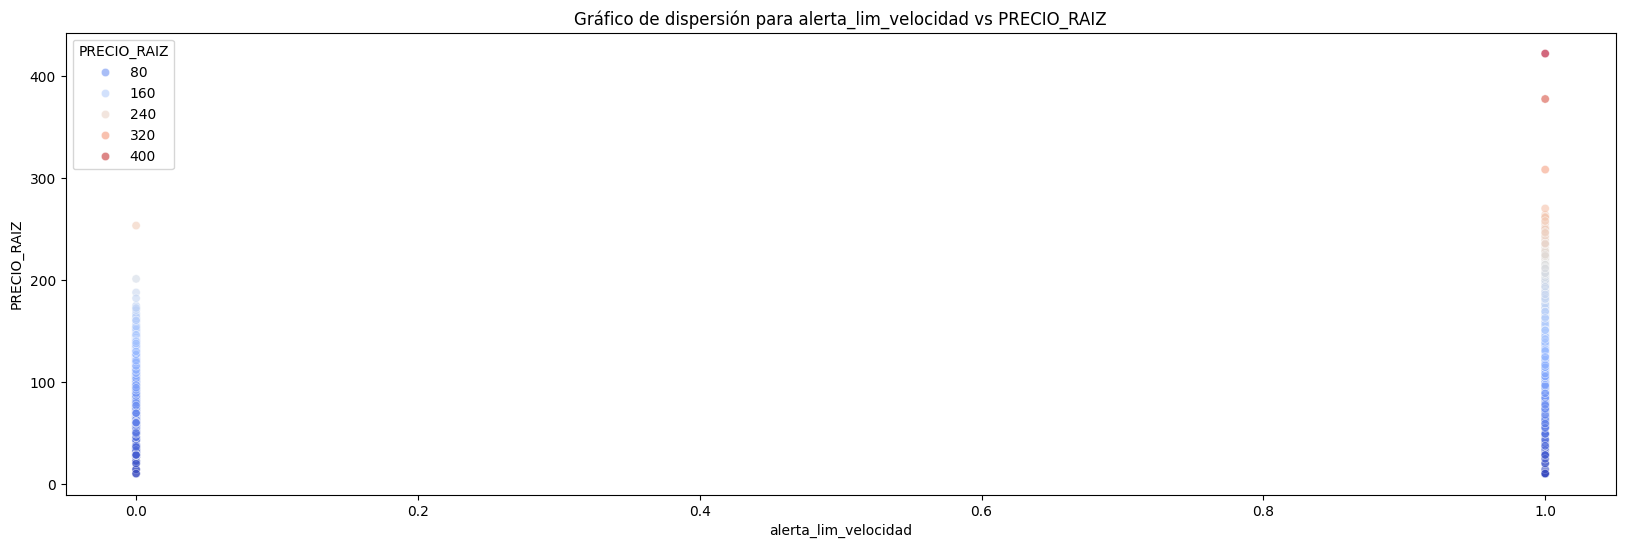

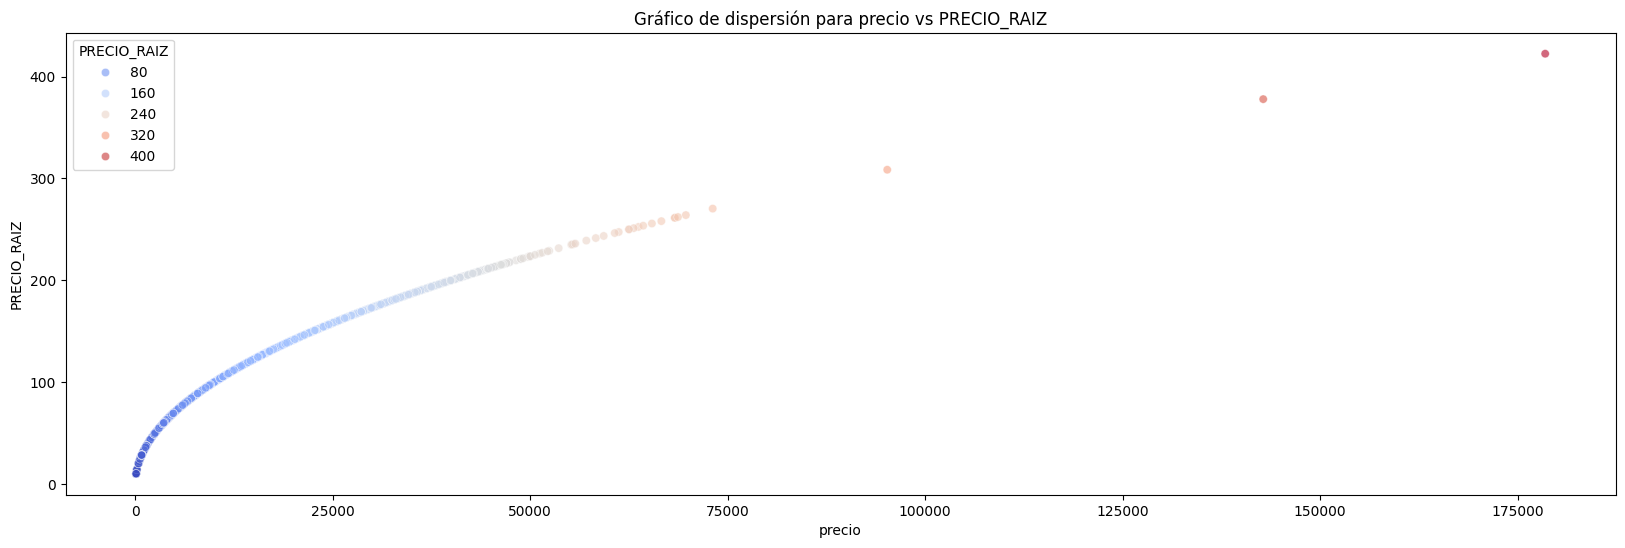

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


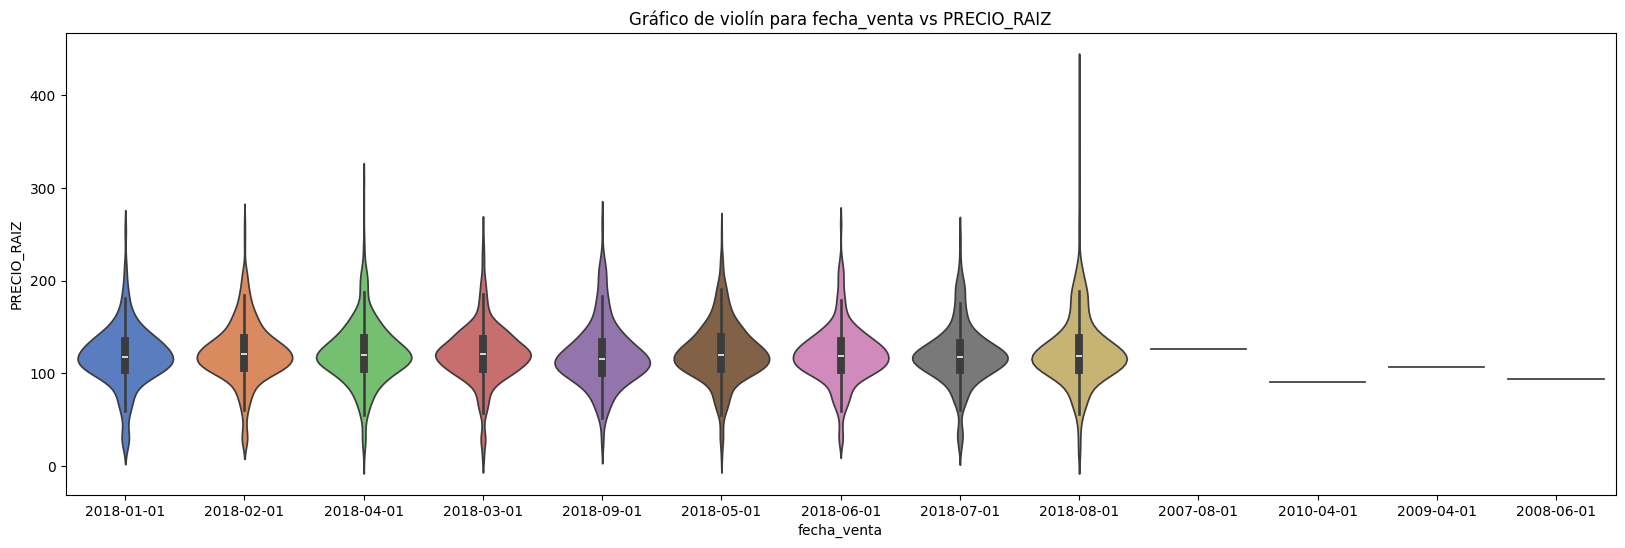

<ipython-input-61-d2dac9aaf45d>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=i, y=target, data=dataframe, inner="box", palette="muted")


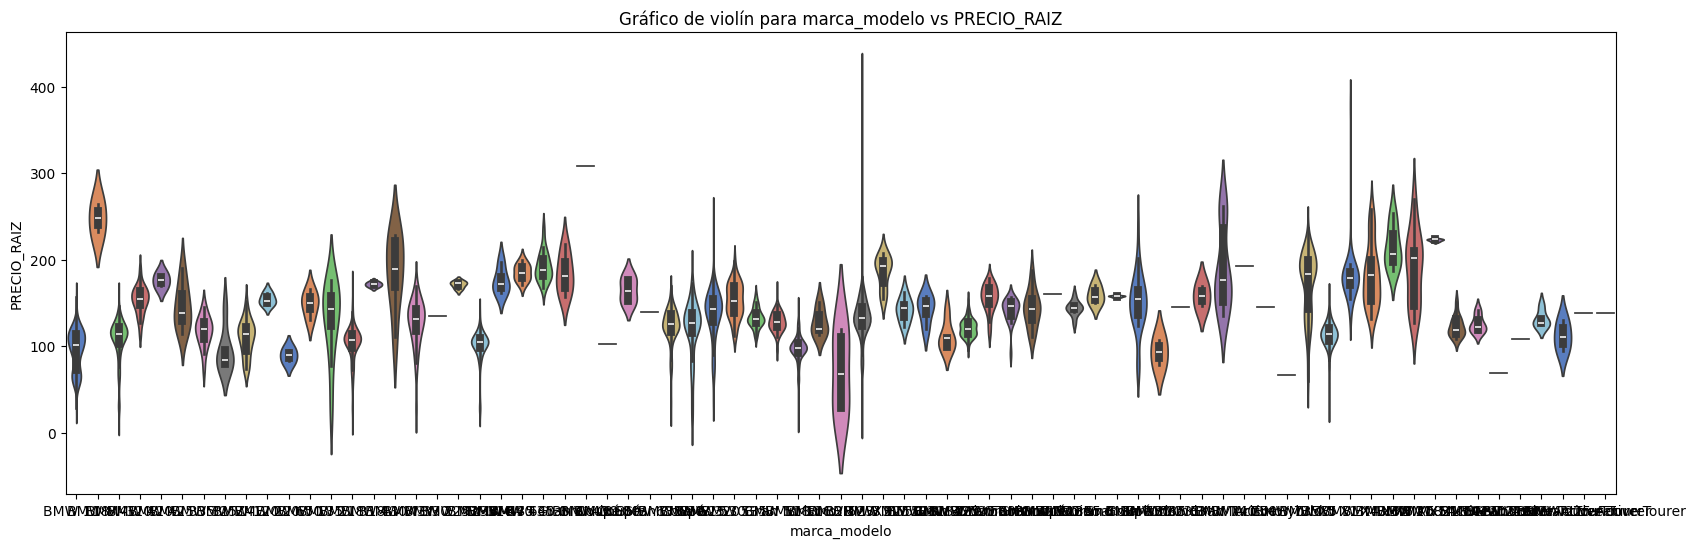

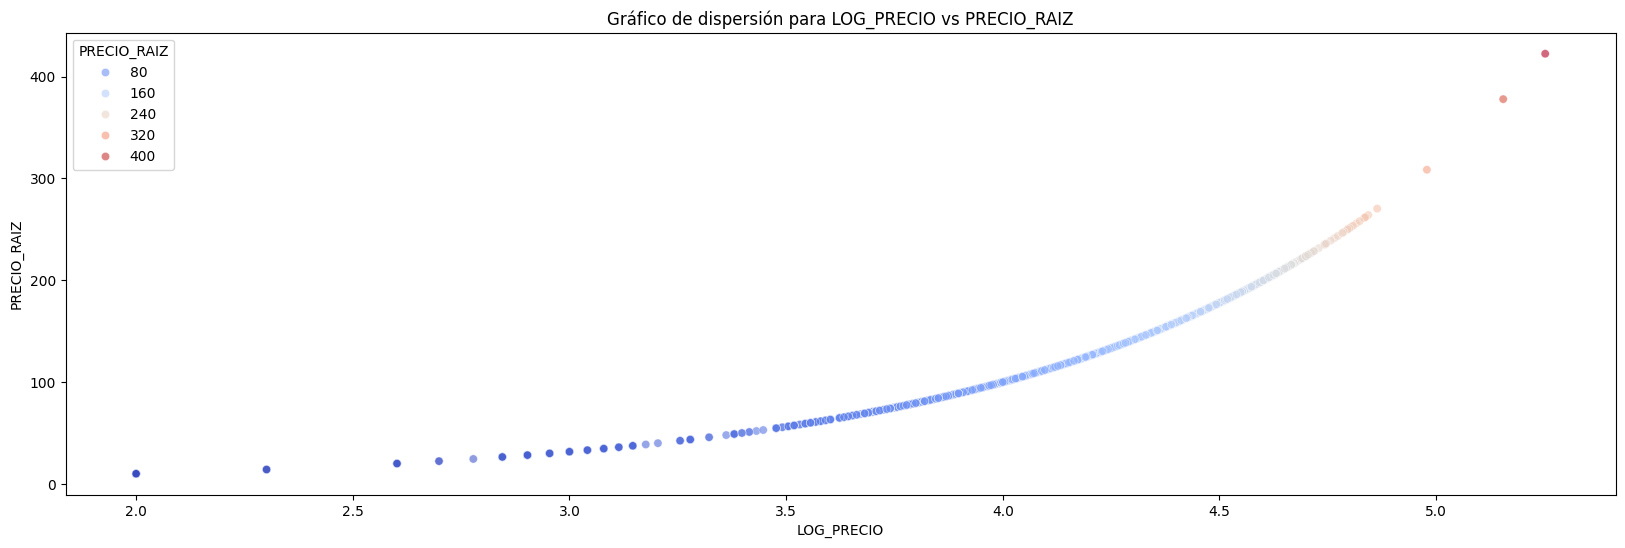

In [70]:
visualize_data(df_bmw2, 'PRECIO_RAIZ')

## OHE

In [71]:
target= ['precio','LOG_PRECIO','PRECIO_RAIZ']

In [72]:
def obtener_lista_variables(dataset):

    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())!= 2 and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind in ("f","i")) and len(dataset[i].unique())== 2 and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind == "O") and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [73]:
lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df_bmw2)

In [74]:
lista_numericas

['km', 'potencia']

In [75]:
lista_boolean

['volante_regulable',
 'aire_acondicionado',
 'camara_trasera',
 'elevalunas_electrico',
 'bluetooth',
 'gps',
 'alerta_lim_velocidad']

In [76]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta', 'marca_modelo']